In [667]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
import copy
from mpl_toolkits import mplot3d
from scipy.stats import skew, kurtosis, iqr, pearsonr, kstest, kruskal
from sklearn.cluster import DBSCAN
import seaborn as sns
from numpy.fft import fft
from sklearn.model_selection import train_test_split, LeaveOneGroupOut
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.signal import stft

# META 1

## 2

In [609]:
def get_pacient_data(pacient_num):
    
    # function that gets all the data from a specific pacient (pacient_num)
    
    folder = f"data/part{pacient_num}"
            
    part1 = pd.read_csv(f"{folder}/part{pacient_num}dev1.csv")
    part1.columns = ["Device_ID", "accelerometer_x", "accelerometer_y", "accelerometer_z", "gyroscope_x", "gyroscope_y", "gyroscope_z", "magnetometer_x", "magnetometer_y", "magnetometer_z", "Timestamp", "Activity Label"]

    part2 = pd.read_csv(f"{folder}/part{pacient_num}dev2.csv")
    part2.columns = ["Device_ID", "accelerometer_x", "accelerometer_y", "accelerometer_z", "gyroscope_x", "gyroscope_y", "gyroscope_z", "magnetometer_x", "magnetometer_y", "magnetometer_z", "Timestamp", "Activity Label"]

    part3 = pd.read_csv(f"{folder}/part{pacient_num}dev3.csv")
    part3.columns = ["Device_ID", "accelerometer_x", "accelerometer_y", "accelerometer_z", "gyroscope_x", "gyroscope_y", "gyroscope_z", "magnetometer_x", "magnetometer_y", "magnetometer_z", "Timestamp", "Activity Label"]
    
    part4 = pd.read_csv(f"{folder}/part{pacient_num}dev4.csv")
    part4.columns = ["Device_ID", "accelerometer_x", "accelerometer_y", "accelerometer_z", "gyroscope_x", "gyroscope_y", "gyroscope_z", "magnetometer_x", "magnetometer_y", "magnetometer_z", "Timestamp", "Activity Label"]
    
    part5 = pd.read_csv(f"{folder}/part{pacient_num}dev5.csv")
    part5.columns = ["Device_ID", "accelerometer_x", "accelerometer_y", "accelerometer_z", "gyroscope_x", "gyroscope_y", "gyroscope_z", "magnetometer_x", "magnetometer_y", "magnetometer_z", "Timestamp", "Activity Label"]

    pacient_data = pd.concat([part1, part2, part3, part4, part5], ignore_index=True)
    
    pacient_data = pacient_data.to_numpy()
                
    return pacient_data

data = get_pacient_data(1)


## 3

In [610]:
def get_all_data():
    
    # returns all data from all pacients and stores it in a dataframe
    # returns a list with the pacient relative to each row of the dataframe
    
    all_data = pd.DataFrame(get_pacient_data(0))
    all_data.columns = ["Device_ID", "accelerometer_x", "accelerometer_y", "accelerometer_z", "gyroscope_x", "gyroscope_y", "gyroscope_z", "magnetometer_x", "magnetometer_y", "magnetometer_z", "Timestamp", "Activity Label"]
    
    utentes = [0] * all_data.shape[0]
    
    for i in range(1, 15):
        
        data_pacient = pd.DataFrame(get_pacient_data(i))
        data_pacient.columns = ["Device_ID", "accelerometer_x", "accelerometer_y", "accelerometer_z", "gyroscope_x", "gyroscope_y", "gyroscope_z", "magnetometer_x", "magnetometer_y", "magnetometer_z", "Timestamp", "Activity Label"]
        
        all_data = pd.concat([all_data, data_pacient], ignore_index = True)
        
        utente = [i] * data_pacient.shape[0]
        utentes.extend(utente)
    
    return all_data, utentes

In [611]:
all_data_pd, all_utentes = get_all_data()

all_data_pd["Activity Label"][806255] = 9
all_data_pd["Activity Label"][959786] = 8
all_data_pd["Activity Label"][1012601] = 8
all_data_pd["Activity Label"][1012984] = 8

all_data_array = np.array(all_data_pd)

shape = all_data_pd.shape

In [612]:
all_data_pd.head()

,Device_ID,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,magnetometer_x,magnetometer_y,magnetometer_z,Timestamp,Activity Label
0,1.0,-1.7963,9.3742,2.4460,-1.56180,-0.66165,0.59730,-0.34274,0.57631,1.0000,525.42,1.0
1,1.0,-1.8696,9.3000,2.3514,-1.18770,-1.28410,0.14212,-0.34476,0.59639,1.0156,544.95,1.0
2,1.0,-1.7961,9.3624,2.4584,-0.58399,-2.03340,0.42912,-0.32863,0.62249,1.0156,564.48,1.0
3,1.0,-1.6768,9.3506,2.4685,-0.37050,-1.36470,0.37194,-0.33669,0.62048,1.0245,584.01,1.0
4,1.0,-1.6656,9.3378,2.4319,-0.79053,0.17793,0.38763,-0.32661,0.60442,1.0200,603.55,1.0


In [613]:
all_data_pd.describe()

,Device_ID,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,magnetometer_x,magnetometer_y,magnetometer_z,Timestamp,Activity Label
count,3.930798e+06,3.930798e+06,3.930798e+06,3.930798e+06,3.930798e+06,3.930798e+06,3.930798e+06,3.930798e+06,3.930798e+06,3.930798e+06,3.930798e+06,3.930798e+06
mean,3.003978e+00,1.682644e-01,8.384117e+00,1.819435e+00,-3.474296e-01,1.967062e+00,3.983144e-01,-6.436807e-02,5.804006e-01,4.117603e-01,5.514226e+05,4.034046e+00
std,1.420627e+00,2.737210e+00,3.643646e+00,3.635079e+00,3.435112e+01,5.332624e+01,4.621227e+01,4.847835e-01,4.843532e-01,6.679498e-01,3.607794e+05,2.583518e+00
min,1.000000e+00,-2.489000e+01,-2.324600e+01,-2.502500e+01,-5.088600e+02,-5.071500e+02,-4.435800e+02,-2.002100e+00,-1.438800e+00,-1.658700e+00,4.565400e+01,1.000000e+00
25%,2.000000e+00,-1.163200e+00,8.134100e+00,-8.037200e-01,-3.177300e+00,-3.137175e+00,-1.584600e+00,-5.100800e-01,5.000000e-01,-1.543500e-01,2.719500e+05,2.000000e+00
50%,3.000000e+00,2.052150e-02,9.350400e+00,1.687600e+00,-3.138700e-02,-1.049900e-01,1.209200e-01,-1.612900e-02,7.046400e-01,4.741600e-01,5.363900e+05,4.000000e+00
75%,4.000000e+00,1.622600e+00,9.777900e+00,3.393100e+00,5.315200e+00,9.077875e+00,5.533500e+00,2.925300e-01,8.744900e-01,9.465500e-01,7.992200e+05,5.000000e+00
max,5.000000e+00,2.538100e+01,2.598500e+01,2.529000e+01,5.061000e+02,5.035700e+02,4.741600e+02,1.748000e+00,2.988100e+00,3.085500e+00,2.825500e+06,1.600000e+01


In [87]:
fs = 51.2

In [47]:
# lists with the values of the module of the accelaration, gir and mag for each record (all pacients)
mod_acc = []
mod_gir = []
mod_mag = []

all_data = all_data_pd.to_numpy()
print(shape)

for i in range(shape[0]):
    
    acc1 = all_data[i,1]
    acc2 = all_data[i,2]
    acc3 = all_data[i,3]
    gir1 = all_data[i,4]
    gir2 = all_data[i,5]
    gir3 = all_data[i,6]
    mag1 = all_data[i,7]
    mag2 = all_data[i,8]
    mag3 = all_data[i,9]
    
    acc = math.sqrt(acc1**2 + acc2**2 + acc3**2)
    gir = math.sqrt(gir1**2 + gir2**2 + gir3**2)
    mag = math.sqrt(mag1**2 + mag2**2 + mag3**2)
    
    mod_acc.append(acc)
    mod_gir.append(gir)
    mod_mag.append(mag)
    
print(len(mod_acc))

(3930798, 12)
3930798


### 3.1

In [15]:
activity = all_data[:, -1]

# data_box dataframe with the modules values and the activity
data_box = pd.DataFrame(list(zip(mod_acc, mod_gir, mod_mag, activity)), columns=['acc', 'gyro', 'mag', 'activity'])

def boxplot(var):
    
    # displays the boxplots of the data for all activities
    
    try:
        
        for h in range(1, 16):
            
            data_mod = data_box[data_box['activity'] == h]
            data_mod = data_mod[var]
            
            plt.boxplot(data_mod)
            plt.show()
    
    except:
        
        print('Invalid variable')
        

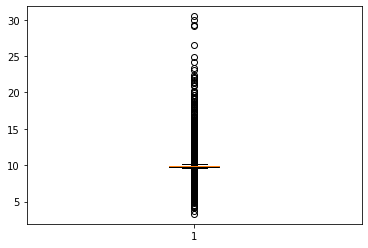

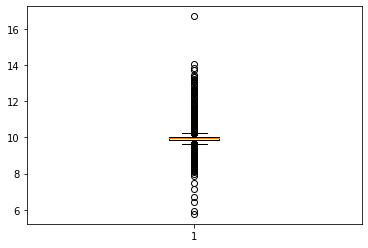

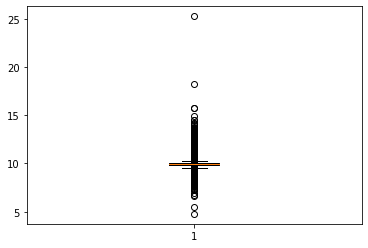

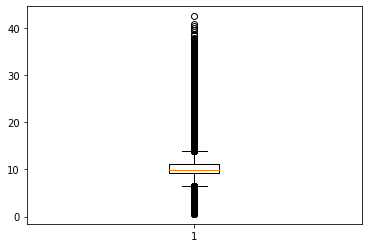

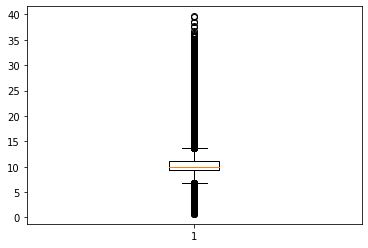

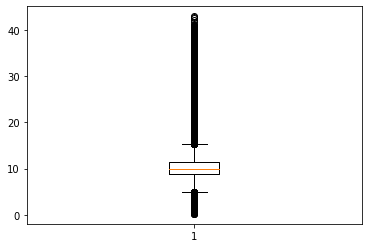

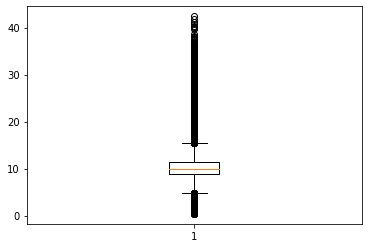

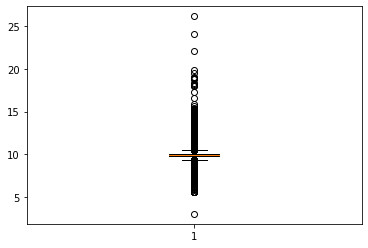

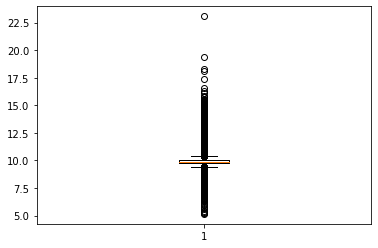

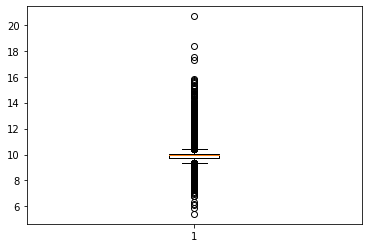

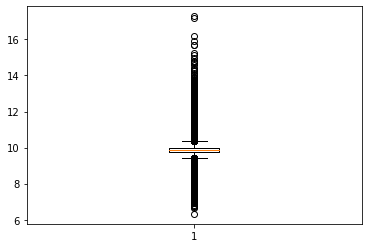

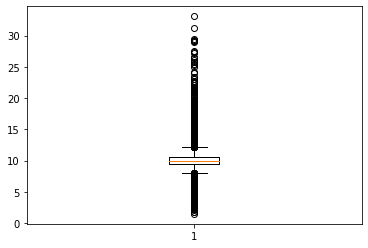

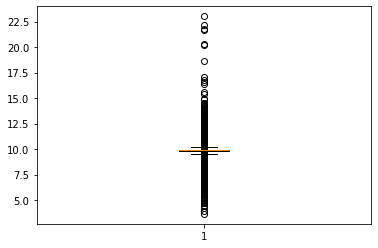

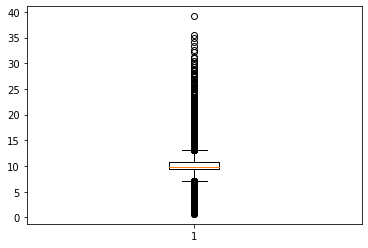

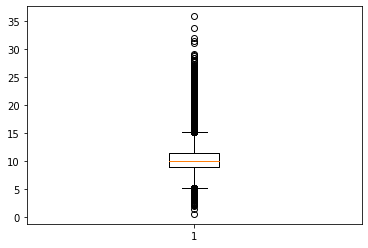

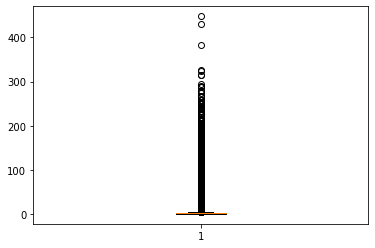

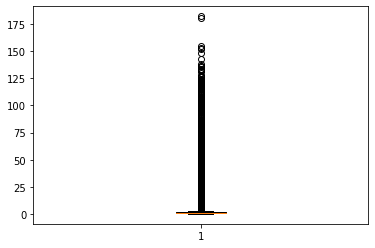

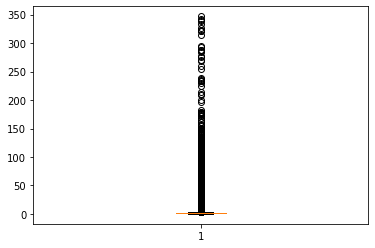

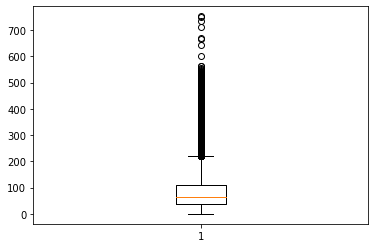

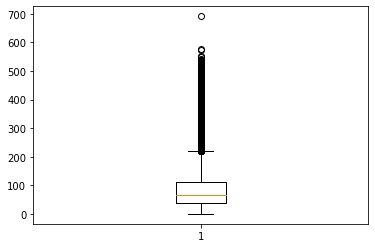

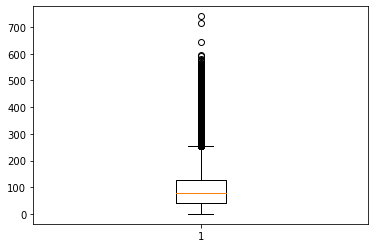

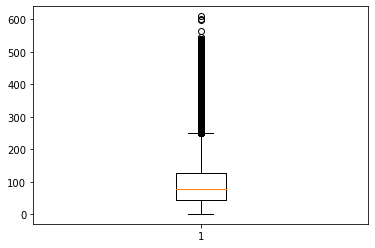

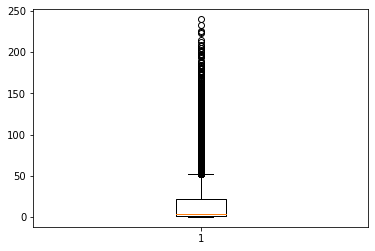

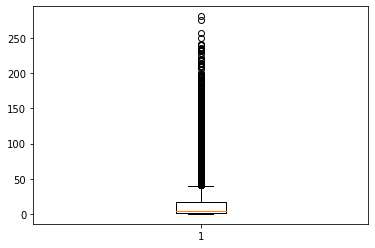

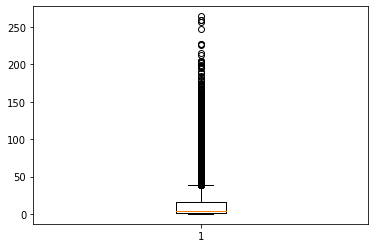

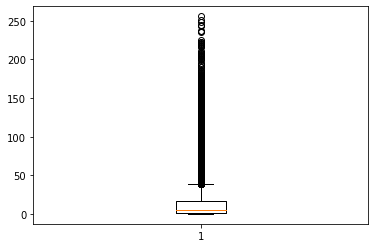

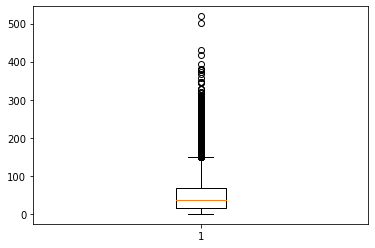

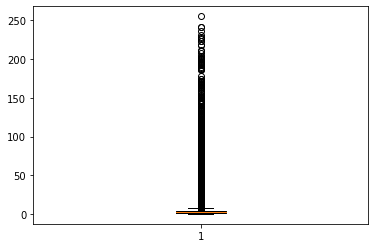

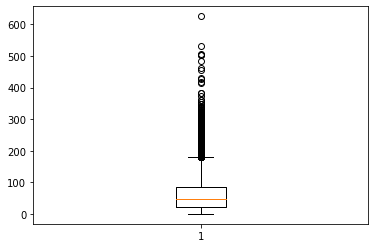

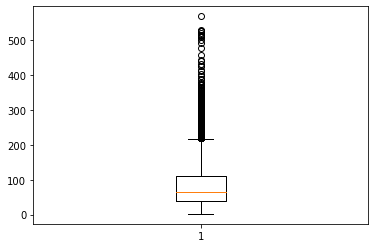

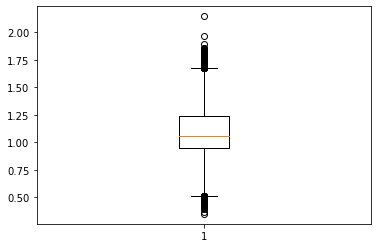

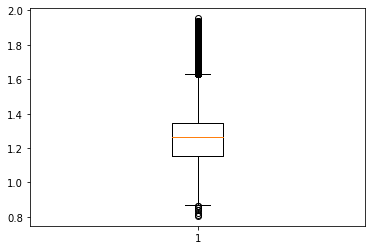

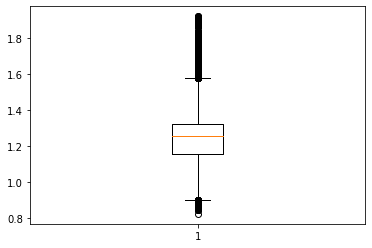

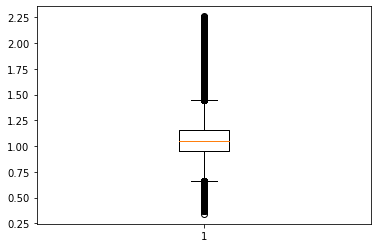

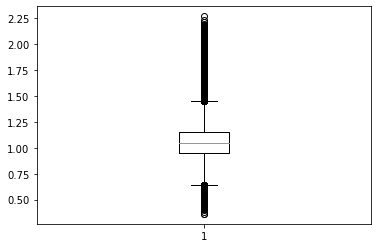

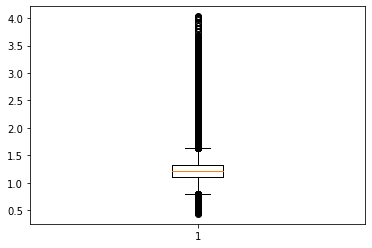

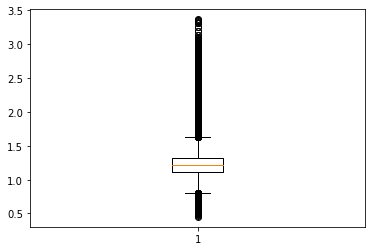

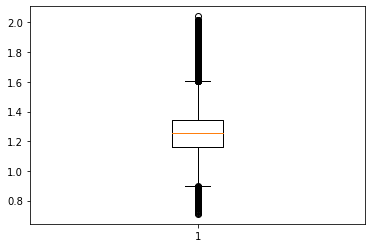

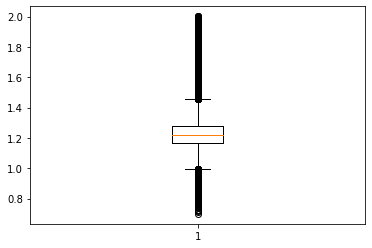

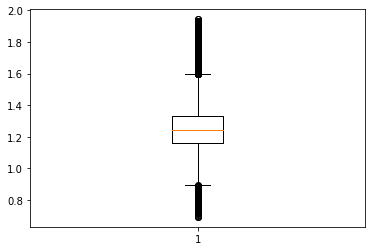

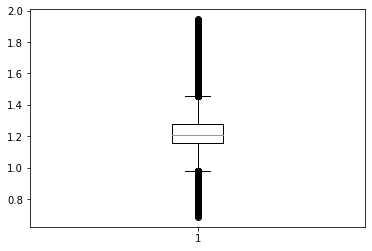

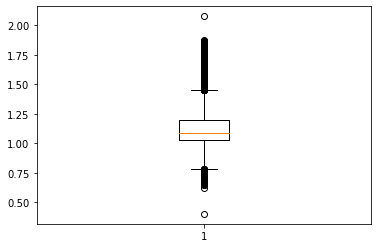

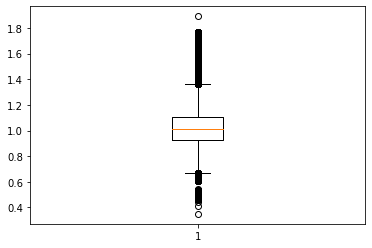

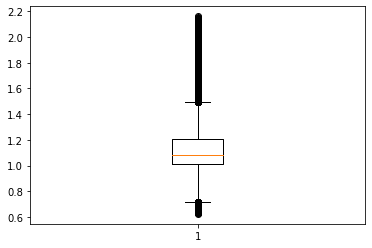

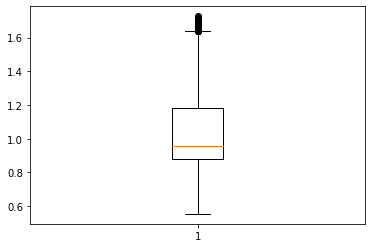

In [16]:
mods = ['acc', 'gyro', 'mag']

for ac in mods:
    boxplot(ac)

In [17]:
def get_IQR(data):
    
    # returns the inter quartile range limits for the data provided
    
    q1, q3 = np.percentile(data, [25 ,75])
    iqr = q3 - q1
    
    return [q1-1.5*iqr, q3+1.5*iqr]

def get_outliers(data):
    
    # returns the index of the outliers (values greater than the interquartile range)
    
    outliers = []
    
    lims = get_IQR(data)
    
    for i in data:
        
        if i < lims[0] or i > lims[1]:
            
            outliers.append(i)
            
    return outliers

def get_density(data):
    
    # returns the outlier density in the data (using inter quartile range to define the outliers)
    
    outliers = get_outliers(data)
    
    n0 = len(outliers)
    nr = len(data)
    
    return (n0/nr) * 100

In [18]:
transformed_data = []

for i in range(len(mod_acc)):
    
    transformed_data.append([mod_acc[i], mod_gir[i], mod_mag[i]])

transformed_data2 = [mod_acc, mod_gir, mod_mag]

for data in transformed_data2:
    
    print(f"density: {get_density(data)}")

density: 28.068753469397308
density: 4.090619767283895
density: 4.433527237980685


In [19]:
transformed_data_df = pd.DataFrame(transformed_data)
transformed_data_array = np.array(transformed_data)

print(transformed_data_array[0, :])

[9.85318402 1.79826785 1.20399498]


### 3.2

When analyzing the density of the outliers, we can see that the there are more outliers in the data related to the modules of the accelerometer than in the others two.
While, on the one hand, this data has an outlier density of roughly 28%, this value is between 4-4.5% for the modules of the gyroscope and the magnetometer.

### 3.3

In [20]:
def z_score(data, k):
    
    # returns the outliers using the zscore
    
    outliers = []
    
    mean = np.mean(data)
    std = abs(np.std(data))
    
    lim_sup = mean + k * std
    lim_inf = mean - k * std
    
    for i in data:
                
        if i > lim_sup or i < lim_inf:
            
            outliers.append(i)
    
    return outliers


### 3.4

In [21]:
def outliers_plots(all_data):
    
    # all_data - array with the data
    # plots the data with ouliers in red and normal data in blue
    
    vars_ = ["acceleration", "gyroscope", "magnemometer"]
    
    fig, axs = plt.subplots(3, 3)
    
    #plots the outliers
    for i in range(3):
                
        k = 3 + i * 0.5
        
        for h in range(3):
            
            data = all_data[:, h]
            outliers = z_score(data, k)

            axs[i, h].scatter(np.ones(len(data)), data, c='blue')
            axs[i, h].scatter(np.ones(len(outliers)), outliers, c='red')
            axs[i, h].set_title(f"{vars_[h]} - k = {k}")
    
    fig.show()

/tmp/ipykernel_86621/3639814661.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


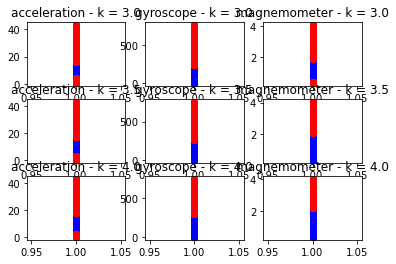

In [22]:
outliers_plots(transformed_data_array)

### 3.5

Comparando os gráficos obtidos na alínea anterior e na alínea 3.1, conseguimos perceber que estes são semelhantes. Em ambos os casos é possível observar que a maioria dos outliers são superiores à média e que este dataset tem bastantes outliers.

### 3.6

In [620]:
def centroid_diff(old, new, n):
    
    # returns the avg difference between the old and the new centroids
    
    diffs = []
    
    for i in range(n):
        
        old_i = old[i]
        new_i = new[i]
        
        diff = abs(sum(old_i)-sum(new_i))/len(old_i)
        
        diffs.append(diff)
    
    return np.mean(diffs)
            

def distance(x1, x2):
    
    # distance between two data points (x1 and x2)
    
    return np.sqrt(np.sum(x1-x2)**2)


def get_closest_centroid(point, centroids):
    
    # returns the idx of the closest centroid (in what position of the centroids array is the closest centroid)
    
    dist = None
    idx = None
        
    for i in range(len(centroids)):
                
        dist_i = distance(np.array(point), np.array(centroids[i]))
        
        if dist == None:
            
            dist = dist_i
            idx = i
        
        elif dist_i < dist:
            
            dist = dist_i
            idx = i
            
    return idx
              

def update_centroids(data_centroids, n):
    
    # computes the new coordinates for the centroids based on their clusters
    
    new_centroids = []
    
    for i in range(n):
        
        data = data_centroids[i]
        
        average = [sum(x)/len(x) for x in zip(*data)]
                
        new_centroids.append(average)
    
    return new_centroids
    
def k_means(data_init, n, max_iter=-1, dist_stop = 0.01):
    
    # k_means algorithm - returns the clusters and the centroids
    
    print("Scaling data...")
    
    scaler = StandardScaler()
    scaler.fit(data_init)
    data = scaler.transform(data_init)
    
    num_samples = data.shape[0]
    centroids_ids = np.random.choice(num_samples, n, replace=False)
    centroids = []
    clusters = [[] for k in range(n)]
    
    print("Creating cluster...")
    
    # Generate centroids
    for idx in centroids_ids:
        point = list(data[idx, :])
        centroids.append(point)
    
    # Associate each data point with a centroid
    for data_point in data:
        closest_centroid = get_closest_centroid(data_point, centroids)
        clusters[closest_centroid].append(data_point)
    
    if max_iter != -1:
        
        for iteration in range(max_iter - 1):

            old_centroids = centroids

            #Update centroids
            centroids = update_centroids(clusters, n)
            
            centroid_dist = centroid_diff(old_centroids, centroids, n)
            
            if centroid_dist < dist_stop:
                
                return clusters, centroids

            #create new clusters
            
            clusters = [[] for k in range(n)]
            
            for data_point in data:
                closest_centroid = get_closest_centroid(data_point, centroids)
                clusters[closest_centroid].append(data_point)
            
    return clusters, centroids

In [278]:
 
print("Starting...")
kmeans_clusters = (k_means(transformed_data_array, 10, dist_stop=0.03, max_iter=350))

Starting...
Scaling data...
Creating cluster...


In [280]:
def get_outliers_kmeans(clusters, centroids):
    
    # gets the outliers for each cluster in the kmeans algorithm
    # in order to identify outliers in each cluster we used the iqr with the distances to the centroid 
    # (all points whose distance to the centroid bigger than q3 + 1.5*iqr are outliers)
    
    all_outliers = []
            
    for i in range(len(centroids)):
        
        dists = []
        
        outliers_idx = []
        
        centroid = centroids[i]
        data_points = np.array(clusters[i])
        
        for data_point in data_points:
            
            dists.append(distance(centroid, data_point))
            
        iqr_outliers = get_IQR(dists)
                            
        for h in range(len(dists)):
            if dists[h] > iqr_outliers[1]:
                outliers_idx.append(h)
        
        outliers = data_points[outliers_idx]
        
        all_outliers.append(outliers)
        
    return all_outliers

In [281]:
clusters, centroids = kmeans_clusters

outliers = get_outliers_kmeans(clusters, centroids)   

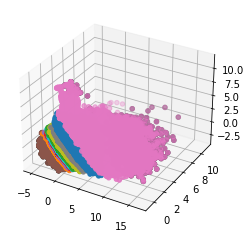

In [282]:
fig = plt.figure()
ax = plt.axes(projection='3d')


# Data for three-dimensional scattered points

for out in outliers:
    outliers_x = [x[0] for x in out]
    outliers_y = [x[1] for x in out]
    outliers_z = [x[2] for x in out]
    ax.scatter3D(outliers_x, outliers_y, outliers_z, c='black')
    
for cluster in clusters:
    xdata = [x[0] for x  in cluster]
    ydata = [x[1] for x  in cluster]
    zdata = [x[2] for x  in cluster]
    ax.scatter3D(xdata, ydata, zdata)
    
ax.scatter3D
    
plt.show()

In [684]:
#DBSCAN

dbscan = DBSCAN(eps = 2.5, min_samples=10)

In [ ]:
dbscan.fit(transformed_data_array)

# can't run dbscan - always get an error saying the kernel was killed... 

In [26]:
#fig = plt.figure()
#ax = plt.axes(projection='3d')

### 3.8

In [151]:
def max_amplitude(mean, std, k):
    
    # gets the maximum distance between a point and the mean +- k* std 

    max_amp = 0
    
    mean = np.mean(data)
    std = abs(np.std(data))
    
    for i in data:
                
        if i > (mean + k * std):
            
            amp = abs(i - (mean + k * std))
            
            if amp > max_amp:    
                max_amp = amp
            
        elif i < (mean - k * std):
            
            amp = abs(i - (mean - k * std))

            if amp > max_amp:
                max_amp = amp

    return max_amp

def get_points(mean, std, k, num):
    
    # mean - mean of the data
    # std - std of the data
    # k - integer
    # num - number of points we want to create
    # return an array with num points
    
    max_amp = max_amplitude(mean, std, k)
    mean_col = np.array([mean] * num)
    std_col = np.array([std] * num)
    s_col = np.random.choice([-1, 1], num)
    q_col = np.random.uniform(0, max_amp, num)
    
    dev = std_col + q_col
    k_dev = np.dot(k, dev)
    test = s_col * k_dev
    
    return mean_col + s_col * np.dot(k, (std_col + q_col))

def inject_outliers(data, k, desired):
    
    # injects outliers in the data so that the outlier density = desired
    # data: all data points
    # k: var defined in 3.3
    # desired: desired outlier density (from 0 to 1) 
    
    outliers = get_outliers(data)
    n0 = len(outliers)
    nr = len(data)
    density = n0/nr
        
    data2 = copy.deepcopy(data)
    
    while density < desired:
        
        print(density)
        
        num_points = math.ceil((desired-density) * nr)
        
        if num_points == 0:
            return data2
         
        mean = np.mean(data2)
        std = np.std(data2)
                
        new_points = get_points(mean, std, k, num_points)
        
        normal_idx1 = np.where(data2 > mean - k * std)
        normal_idx2 = np.where(data2 < mean + k * std)
        normal_idx = np.intersect1d(normal_idx1, normal_idx2)
        idx_delete = np.random.choice(normal_idx, num_points, replace=False)
        
        data2 = np.delete(data2, idx_delete)
        data2 = np.append(data2, new_points)
        
        outliers = get_outliers(data2)
        n0 = len(outliers)
        density = n0/nr
                        
    return data2

In [152]:
#print(inject_outliers(transformed_data_array[:, 0], 2, 0.1))

0.28068753469397306
[9.85318402 9.77315129 9.8450109  ... 9.75566188 9.76752906 9.75334997]


### 3.9

In [144]:
# Linear model

def get_matrix(data, p):
    
    # data - array with the data
    # p - p argument
    # return the matrixes needed to compute the betas
    
    shape = data.shape
    
    matrix = []
    matrix_result = []
    
    for i in range(shape[0]):
        
        if p > i:
            
            diff = p - i
            
            row = [0] * diff
            
            for h in range(p-diff):
                
                row.append(data[h])  
            
        else:
            
            row = list(data[i-p:i])
        
        matrix.append(row)
        matrix_result.append(data[i])
     
    matrix = np.array(matrix)
    matrix_result = np.array(matrix_result).T
    return matrix, matrix_result

    
def get_beta(matrix, Y):
    
    # matrix - X matrix in the linear regression formula
    # Y - Y matrix in the linear regression formula
    # returns an array with size p with the values for beta
    
    X = np.linalg.pinv(matrix)
    return np.dot(X, Y)

In [146]:
acc_mats = get_matrix(transformed_data_array[:, 0], 5)
betas = get_beta(acc_mats[0], acc_mats[1])
print(betas)

[ 0.06642459  0.06279363 -0.04579206 -0.12739541  1.03904228]


### 3.10

In [164]:
def get_prediction(matrix, betas):
    
    # matrix - X matrix in lin regression formula
    # betas - betas (computed using get_beta() method)
    # return expected values for all elements
    
    return np.dot(matrix, betas)

acc_module = transformed_data_array[:, 0]
predictions = get_prediction(acc_mats[0], betas)

mod_acceleration = inject_outliers(transformed_data_array[:, 0], 3, 0.1)

outliers = get_outliers(mod_acceleration)

outliers_idx = np.where(np.in1d(mod_acceleration, outliers))[0]


for idx in outliers_idx:
    acc_module[idx] = outliers[idx]

0.28068753469397306
1103326 1103326


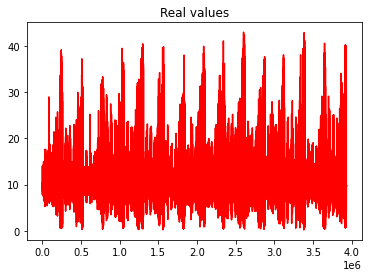

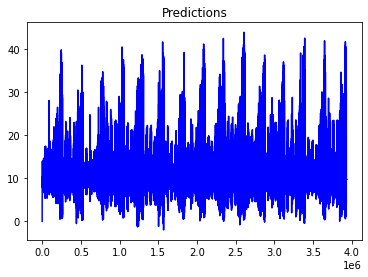

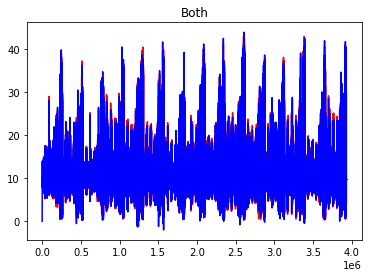

In [165]:
plt.plot(transformed_data_array[:, 0], "r")
plt.title("Real values")
plt.show()

plt.plot(predictions, "b")
plt.title("Predictions")
plt.show()

plt.plot(transformed_data_array[:, 0], "r")
plt.plot(predictions, "b")
plt.title("Both")
plt.show()

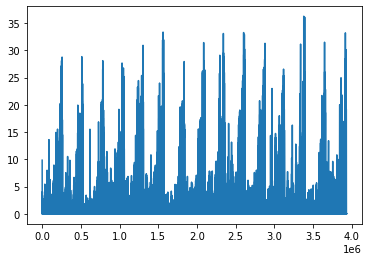

In [167]:
error = []

for i in range(len(predictions)):
    
    error.append(abs(transformed_data_array[i,0] - predictions[i]))
    
plt.plot(error)
plt.show()

Como podemos ver pelos gráficos, o modelo linear faz as previsões com algum atraso (no gráfico de cima os "picos" estão um pouco atrasados, sendo este atraso representado pelos erros maiores no gráfico de baixo). Para além disso, observamos que a previsão dos primeiros p valores está completamente errada (como era esperaro). 

### 3.11

In [197]:
def get_matrices_2(data, p):
    
    # data - array with the data
    # p - p argument
    # return the matrixes needed to compute the betas in the format required in exercise 3.11
    
    if p%2 != 0:
        print("Select an even value for p")
        return
    
    shape = data.shape
    matrix = []
    p = int(p/2)
    
    for i in range(shape[0]):
        
        row = []
        
        if p > i:
            
            diff = p - i
            row.extend([0] * diff)
            
            for h in range(p-diff):
                row.append(data[h])
            
        else:
            
            row = list(data[i-p:i])
         
        if p > shape[0]-(i+1):
            
            diff = p - (shape[0]-(i+1))
            
            for h in range(p-diff):                
                row.append(data[-(h+1)])
                
            row.extend([0] * diff)
            
        else:
            row.extend((data[i+1:i+p+1]))
        
        matrix.append(row)
     
    matrix = np.array(matrix)
    return matrix

In [198]:
matrix1 = get_matrices_2(transformed_data_array[:, 0], 6)
matrix2 = get_matrices_2(transformed_data_array[:, 0], 6)
matrix3 = get_matrices_2(transformed_data_array[:, 0], 6)

In [200]:
matrix_all_var = np.concatenate((matrix1, matrix2, matrix3), axis=1)
print(matrix_all_var.shape)

(3930798, 18)


In [203]:
betas = get_beta(matrix_all_var, transformed_data_array[:, 0])

prediction = get_prediction(matrix_all_var, betas)

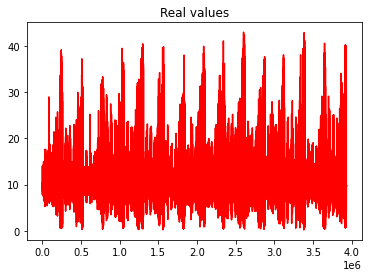

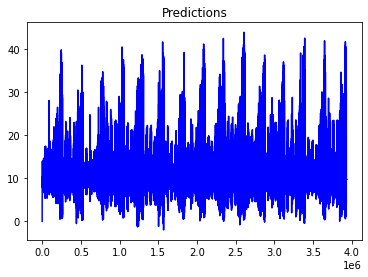

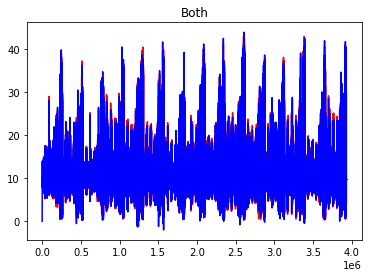

In [204]:
plt.plot(transformed_data_array[:, 0], "r")
plt.title("Real values")
plt.show()

plt.plot(predictions, "b")
plt.title("Predictions")
plt.show()

plt.plot(transformed_data_array[:, 0], "r")
plt.plot(predictions, "b")
plt.title("Both")
plt.show()

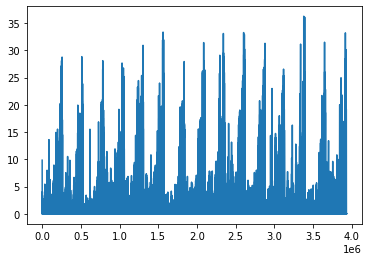

In [205]:
error = []

for i in range(len(predictions)):
    
    error.append(abs(transformed_data_array[i,0] - predictions[i]))
    
plt.plot(error)
plt.show()

Comparando os resultados do modelo do primeiro modelo linear com os do modelo linear construído neste exercício, conseguimos observar que não se apresentam grandes diferenças nos resultados

## 4

### 4.1

In [25]:
#KS-test

def is_normal(data):
    
    # data - array with the data
    # returns - True if array follows a normal distribution (p value = 0.05) and False otherwise
    
    mean = np.mean(data)
    std = np.std(data)
    
    ks_stat, ks_p_value = kstest(data, cdf='norm')
    
    return ks_p_value >= 0.05
    

for col in range(transformed_data_array.shape[1]):
    print(is_normal(transformed_data_array[:, col]))

False
False
False


Como podemos ver, os p values são muito baixos (estão arredondados para zero), o que significa que se rejeita a hipótese nula. Isto significa que nenhuma destas variáveis segue uma distribuição normal. Com isto em mente, vamos escolher um teste não paramétrico. Como queremos avaliar a importância estatísca do valor médio de mais de dois grupos, vamos utilizar o teste de Kruskal-Wallis.

In [34]:
def kruskal_wallis(data):
    
    # returns the results of the kruskal wallis test on the data
    # data - array with the columns in which we want to perform the test
    
    results_kruskal = []
    
    data_act1 = data[np.where(data[:, 3] == 1)]
    data_act2 = data[np.where(data[:, 3] == 2)]
    data_act3 = data[np.where(data[:, 3] == 3)]
    data_act4 = data[np.where(data[:, 3] == 4)]
    data_act5 = data[np.where(data[:, 3] == 5)]
    data_act6 = data[np.where(data[:, 3] == 6)]
    data_act7 = data[np.where(data[:, 3] == 7)]
    data_act8 = data[np.where(data[:, 3] == 8)]
    data_act9 = data[np.where(data[:, 3] == 9)]
    data_act10 = data[np.where(data[:, 3] == 10)]
    data_act11 = data[np.where(data[:, 3] == 11)]
    data_act12 = data[np.where(data[:, 3] == 12)]
    data_act13 = data[np.where(data[:, 3] == 13)]
    data_act14 = data[np.where(data[:, 3] == 14)]
    data_act15 = data[np.where(data[:, 3] == 15)]
    data_act16 = data[np.where(data[:, 3] == 16)]

    
    for col in range(3):
        
        results = kruskal(data_act1[:, col], 
                          data_act2[:, col], 
                          data_act3[:, col], 
                          data_act4[:, col], 
                          data_act5[:, col], 
                          data_act6[:, col], 
                          data_act7[:, col], 
                          data_act8[:, col], 
                          data_act9[:, col], 
                          data_act10[:, col], 
                          data_act11[:, col], 
                          data_act12[:, col],
                          data_act13[:, col],
                          data_act14[:, col],
                          data_act15[:, col],
                          data_act16[:, col],)
        
        results_kruskal.append(results)
    
    return results_kruskal

In [35]:
kruskal_results = kruskal_wallis(np.array(data_box))

print(kruskal_results)

[KruskalResult(statistic=41664.82826802613, pvalue=0.0), KruskalResult(statistic=2821698.4262063694, pvalue=0.0), KruskalResult(statistic=608102.8136893142, pvalue=0.0)]


Como podemos ver, os p values são muito baixos (estão arredondados para zero), o que significa que se rejeita a hipótese nula. Isto significa que o valor médio das variáveis em cada atividade não tem importância estatística.

### 4.2

In [615]:
def get_crossing_rate(col, n):
    
    # col - 1D array with data
    # n - number
    # returns - number of times the data went from bigger than n to smaller than n divided by the num of data point in col
    
    num = 0
    old = n
    new = 0
    
    for i in range(len(col)):
        
        new = col[i]
        
        diff = (new-n) * (old-n)
                
        if diff < 0:
            num += 1
        
        if new != n:
            old = new
        
    return num/len(col)
                
      
def get_features(col):
    
    # col - 1D array with data
    # return - array with the features than are inside the table in the article
    
    #mean
    mean = np.mean(col)
    
    #median
    median = np.median(col)
    
    #std
    std = np.std(col)
    
    #var
    var = np.var(col)
    
    #root mean square
    rms = np.sqrt(np.mean(col**2))
    
    #averaged derivatives
    derivatives = np.gradient(col)
    avg_der = np.mean(derivatives)
    
    #skewness
    skewness = skew(col)
    
    #kurtosis
    kurt = kurtosis(col)
    
    #inter quartile range
    q1, q3 = np.percentile(col, [25 ,75])
    iqr = q3 - q1

    #zero crossing rate
    zcr = get_crossing_rate(col, 0)
    
    #mean crossing rate
    mcr = get_crossing_rate(col, mean)
    
    #spectral entropy
    
    
    # 
    
    
    return [mean, median, std, var, rms, avg_der, skewness, kurt, iqr, zcr, mcr]

def get_movement_intensity(x, y, z):
    
    # x, y, z - 1D arrays with the data for each axis
    # returns - mean and std of movement intensity
    
    mi = []
    
    for i in range(len(x)):
        
        sum_ = x[i]**2 + y[i]**2 + z[i]**2
        mi.append(np.sqrt(sum_))
        
    return np.mean(mi), np.std(mi)

def get_sma(x, y, z):
    
    # x, y, z - 1D arrays with the data for each axis
    # returns - Normalized Signal Magnitude Area of the data
    
    sma = []
    sum_x = 0
    sum_y = 0
    sum_z = 0
    
    for i in range(len(x)):
        
        sum_x += abs(x[i])
        sum_y += abs(y[i])
        sum_z += abs(z[i])
    
    return (sum_x + sum_y + sum_z)/len(x)


def get_eigenvalues_dominant(data):
    
    # data - array with the data
    # return - 2 biggest eigenvalues 
    
    cov = np.cov(data.T)
        
    eig = np.linalg.eig(cov)
        
    eigenvalues = eig[0]
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    
    return eigenvalues[0], eigenvalues[1]


def get_dominant_frequency_energy(data):
    
    # data - array with the data
    # returns - dominant frequency
    
    fft_data = np.fft.fft(data)
    energy = sum(abs(fft_data) ** 2)
    N = len(data)
    
    fstep = 1 / 51.2                                # fs = 51.2 Hz
    freqs = np.fft.fftfreq(N, fstep)
    
    peak_coefficient = np.argmax(abs(fft_data))
    peak_freq = freqs[peak_coefficient]
        
    return peak_freq, energy/N

def get_feature_set(data):
    
    # data - array with the data
    # returns - array with the features mentioned in the article
    
    shape = data.shape
    
    feature_list = []
    features = []
    
    for col in range(shape[1]):
        
        features_col = get_features(data[:, col])
        features.extend(features_col)
        
    acc_x = data[:, 0]
    acc_y = data[:, 1]
    acc_z = data[:, 2]
    gyr_x = data[:, 3]
    gyr_y = data[:, 4]
    gyr_z = data[:, 5]
    mag_x = data[:, 6]
    mag_y = data[:, 7]
    mag_z = data[:, 8]
        
    #pairwise correlation
    corr_acc_x_y = pearsonr(acc_x, acc_y)[0]
    corr_acc_x_z = pearsonr(acc_x, acc_z)[0]
    corr_acc_y_z = pearsonr(acc_y, acc_z)[0]
    corr_gyr_x_y = pearsonr(gyr_x, gyr_y)[0]
    corr_gyr_x_z = pearsonr(gyr_x, gyr_z)[0]
    corr_gyr_y_z = pearsonr(gyr_y, gyr_z)[0]
    corr_mag_x_y = pearsonr(mag_x, mag_y)[0]
    corr_mag_x_z = pearsonr(mag_x, mag_z)[0]
    corr_mag_y_z = pearsonr(mag_y, mag_z)[0]
    
    corr_acc_gyr_x_x = pearsonr(acc_x, gyr_x)[0]
    corr_acc_gyr_x_y = pearsonr(acc_x, gyr_y)[0]
    corr_acc_gyr_x_z = pearsonr(acc_x, gyr_z)[0]
    corr_acc_gyr_y_x = pearsonr(acc_y, gyr_x)[0]
    corr_acc_gyr_y_y = pearsonr(acc_y, gyr_y)[0]
    corr_acc_gyr_y_z = pearsonr(acc_y, gyr_z)[0]
    corr_acc_gyr_z_x = pearsonr(acc_z, gyr_x)[0]
    corr_acc_gyr_z_y = pearsonr(acc_z, gyr_y)[0]
    corr_acc_gyr_z_z = pearsonr(acc_z, gyr_z)[0]

    corr_acc_mag_x_x = pearsonr(acc_x, mag_x)[0]
    corr_acc_mag_x_y = pearsonr(acc_x, mag_y)[0]
    corr_acc_mag_x_z = pearsonr(acc_x, mag_z)[0]
    corr_acc_mag_y_x = pearsonr(acc_y, mag_x)[0]
    corr_acc_mag_y_y = pearsonr(acc_y, mag_y)[0]
    corr_acc_mag_y_z = pearsonr(acc_y, mag_z)[0]
    corr_acc_mag_z_x = pearsonr(acc_z, mag_x)[0]
    corr_acc_mag_z_y = pearsonr(acc_z, mag_y)[0]
    corr_acc_mag_z_z = pearsonr(acc_z, mag_z)[0]
    
    corr_gyr_mag_x_x = pearsonr(gyr_x, mag_x)[0]
    corr_gyr_mag_x_y = pearsonr(gyr_x, mag_y)[0]
    corr_gyr_mag_x_z = pearsonr(gyr_x, mag_z)[0]
    corr_gyr_mag_y_x = pearsonr(gyr_y, mag_x)[0]
    corr_gyr_mag_y_y = pearsonr(gyr_y, mag_y)[0]
    corr_gyr_mag_y_z = pearsonr(gyr_y, mag_z)[0]
    corr_gyr_mag_z_x = pearsonr(gyr_z, mag_x)[0]
    corr_gyr_mag_z_y = pearsonr(gyr_z, mag_y)[0]
    corr_gyr_mag_z_z = pearsonr(gyr_z, mag_z)[0]
    
    features.extend([corr_acc_x_y, 
                     corr_acc_x_z, 
                     corr_acc_y_z, 
                     corr_gyr_x_y, 
                     corr_gyr_x_z, 
                     corr_gyr_y_z, 
                     corr_mag_x_y, 
                     corr_mag_x_z, 
                     corr_mag_y_z, 
                     corr_acc_gyr_x_x, 
                     corr_acc_gyr_x_y, 
                     corr_acc_gyr_x_z, 
                     corr_acc_gyr_y_x, 
                     corr_acc_gyr_y_y, 
                     corr_acc_gyr_y_z,
                     corr_acc_gyr_z_x, 
                     corr_acc_gyr_z_y, 
                     corr_acc_gyr_z_z, 
                     corr_acc_mag_x_x,
                     corr_acc_mag_x_y,
                     corr_acc_mag_x_z,
                     corr_acc_mag_y_x,
                     corr_acc_mag_y_y,
                     corr_acc_mag_y_z,
                     corr_acc_mag_z_x,
                     corr_acc_mag_z_y,
                     corr_acc_mag_z_z, 
                     corr_gyr_mag_x_x,
                     corr_gyr_mag_x_y,
                     corr_gyr_mag_x_z,
                     corr_gyr_mag_y_x,
                     corr_gyr_mag_y_y,
                     corr_gyr_mag_y_z,
                     corr_gyr_mag_z_x,
                     corr_gyr_mag_z_y,
                     corr_gyr_mag_z_z])

    #movement intensity
    mi_mean, mi_std = get_movement_intensity(acc_x, acc_y, acc_z)
    features.extend([mi_mean, mi_std])
    
    #normalized signal magnitude area
    sma = get_sma(acc_x, acc_y, acc_z)
    features.extend([sma])
    
    #eigenvalues of dominant directions
    acc_matrix = data[:, :3]
    eigenvalue1, eigenvalue2 = get_eigenvalues_dominant(acc_matrix)
    features.extend([eigenvalue1, eigenvalue2])
    
    # Correlation between acceleration along gravity and heading direction
    # Average acceleration along heading direction
    avg_acc_y = np.mean(acc_y)
    avg_acc_z = np.mean(acc_z)
    avg_acc_heading = np.linalg.norm(np.array([avg_acc_y, avg_acc_z]))
    features.extend([avg_acc_heading])
    
    # Average acceleration along gravity direction
    avg_acc_x = np.mean(acc_x)
    features.extend([avg_acc_x])
    
    # Average rotation angles related to gravity direction
    sum_rotation_angles_gravity = sum(gyr_x)                      
    features.extend([sum_rotation_angles_gravity/len(data)])

    #dominant frequency, energy
    df_acc_x, energy_acc_x = get_dominant_frequency_energy(acc_x)
    df_acc_y, energy_acc_y = get_dominant_frequency_energy(acc_y)
    df_acc_z, energy_acc_z = get_dominant_frequency_energy(acc_z)
    df_gyr_x, energy_gyr_x = get_dominant_frequency_energy(gyr_x)
    df_gyr_y, energy_gyr_y = get_dominant_frequency_energy(gyr_y)
    df_gyr_z, energy_gyr_z = get_dominant_frequency_energy(gyr_z)
    df_mag_x, energy_mag_x = get_dominant_frequency_energy(mag_x)
    df_mag_y, energy_mag_y = get_dominant_frequency_energy(mag_y)
    df_mag_z, energy_mag_z = get_dominant_frequency_energy(mag_z)
    
    features.extend([df_acc_x, energy_acc_x,
                     df_acc_y, energy_acc_y,
                     df_acc_z, energy_acc_z,
                     df_gyr_x, energy_gyr_x,
                     df_gyr_y, energy_gyr_y,
                     df_gyr_z, energy_gyr_z,
                     df_mag_x, energy_mag_x,
                     df_mag_y, energy_mag_y,
                     df_mag_z, energy_mag_z])
    
    #averaged acceleration energy
    avg_acc_energy = (energy_acc_x + energy_acc_y + energy_acc_z)/3
    features.extend([avg_acc_energy])
    
    #averaged rotation energy
    avg_rot_energy = (energy_gyr_x + energy_gyr_y + energy_gyr_z)/3
    features.extend([avg_rot_energy])
    
    return np.array(features)

In [616]:
start = 0
all_segments = []

h = 0

print(all_data_array.shape)

for i in range(1, all_data_array.shape[0]):
        
    if all_data_array[i, -1] != all_data_array[i-1, -1]:
        
        print(i)
        feature_segment = get_feature_set(all_data_array[start:i-1, 1:10])
        start = i
        
        feature_segment = np.append(feature_segment, all_data_array[i-1, -1])
        
        all_segments.append(feature_segment)
     

(3930798, 12)
2559
2943
8703
9087
10239
10623
16383
16767
17919
18046
24191
24318
25599
25726
32127
32254
33279
33406
39551
39678
42623
42750
44031
44158
47231
47358
50431
50558
55678
56062
61822
62206
63358
63742
69502
69886
71166
71293
77438
77565
78718
78845
85118
85245
86398
86525
93054
93181
95742
95869
97022
97149
99966
100093
103294
103421
108541
108925
114685
115069
116221
116605
122365
122877
124029
124156
130173
130300
131581
131708
138109
138236
139261
139388
145533
145660
148605
148732
150013
150140
153085
153212
156413
156540
161660
162044
167804
168188
169340
169596
175484
175868
177020
177147
183420
183547
184700
184827
191228
191355
192380
192507
198780
198907
201724
201851
203132
203259
206204
206331
209532
209659
214779
215163
220923
221307
222459
222843
228603
228987
230139
230266
236539
236666
237819
237946
244347
244474
245499
245626
251899
252026
254971
255098
256251
256378
259323
259450
262651
262778
267386
267898
273530
273914
275066
275578
281210
281594
282746


2069968
2076369
2076496
2077521
2077648
2084177
2084304
2085329
2085456
2091473
2091600
2094673
2094800
2096081
2096208
2099281
2099408
2102353
2102480
2107344
2107728
2113488
2113872
2115024
2115408
2121168
2121552
2122704
2122831
2129232
2129359
2130384
2130511
2136912
2137039
2137936
2138063
2144208
2144335
2147664
2147791
2148816
2148943
2152016
2152143
2155344
2155471
2159823
2160207
2164687
2165071
2165967
2166479
2171087
2171471
2172495
2172622
2177999
2178126
2178895
2179022
2184399
2184526
2185295
2185422
2190415
2190542
2193615
2193742
2194511
2194638
2197199
2197326
2200143
2200270
2204622
2205006
2210766
2211150
2212302
2212686
2218574
2218830
2220110
2220237
2226510
2226637
2227790
2227917
2233934
2234061
2235342
2235469
2241614
2241741
2244942
2245069
2246094
2246221
2249422
2249549
2252622
2252749
2257613
2257997
2263757
2264141
2265293
2265677
2271437
2271821
2272973
2273100
2279501
2279628
2280781
2280908
2287181
2287308
2288333
2288460
2294605
2294732
2297933
2298060


In [330]:
feature_names = ["mean_acc_x", "median_acc_x", "std_acc_x", "var_acc_x", "rms_acc_x", "avg_der_acc_x", "skew_acc_x", "kurt_acc_x", "iqr_acc_x", "zcr_acc_x", "mcr_acc_x",
                 "mean_acc_y", "median_acc_y", "std_acc_y", "var_acc_y", "rms_acc_y", "avg_der_acc_y", "skew_acc_y", "kurt_acc_y", "iqr_acc_y", "zcr_acc_y", "mcr_acc_y",
                 "mean_acc_z", "median_acc_z", "std_acc_z", "var_acc_z", "rms_acc_z", "avg_der_acc_z", "skew_acc_z", "kurt_acc_z", "iqr_acc_z", "zcr_acc_z", "mcr_acc_z",
                 "mean_gyr_x", "median_gyr_x", "std_gyr_x", "var_gyr_x", "rms_gyr_x", "avg_der_gyr_x", "skew_gyr_x", "kurt_gyr_x", "iqr_gyr_x", "zcr_gyr_x", "mcr_gyr_x",
                 "mean_gyr_y", "median_gyr_y", "std_gyr_y", "var_gyr_y", "rms_gyr_y", "avg_der_gyr_y", "skew_gyr_y", "kurt_gyr_y", "iqr_gyr_y", "zcr_gyr_y", "mcr_gyr_y",
                 "mean_gyr_z", "median_gyr_z", "std_gyr_z", "var_gyr_z", "rms_gyr_z", "avg_der_gyr_z", "skew_gyr_z", "kurt_gyr_z", "iqr_gyr_z", "zcr_gyr_z", "mcr_gyr_z",
                 "mean_mag_x", "median_mag_x", "std_mag_x", "var_mag_x", "rms_mag_x", "avg_der_mag_x", "skew_mag_x", "kurt_mag_x", "iqr_mag_x", "zcr_mag_x", "mcr_mag_x",
                 "mean_mag_y", "median_mag_y", "std_mag_y", "var_mag_y", "rms_mag_y", "avg_der_mag_y", "skew_mag_y", "kurt_mag_y", "iqr_mag_y", "zcr_mag_y", "mcr_mag_y",
                 "mean_mag_z", "median_mag_z", "std_mag_z", "var_mag_z", "rms_mag_z", "avg_der_mag_z", "skew_mag_z", "kurt_mag_z", "iqr_mag_z", "zcr_mag_z", "mcr_mag_z",
                 "corr_acc_x_y", "corr_acc_x_z", "corr_acc_y_z", 
                 "corr_gyr_x_y", "corr_gyr_x_z", "corr_gyr_y_z", 
                 "corr_mag_x_y", "corr_mag_x_z", "corr_mag_y_z", 
                 "corr_acc_gyr_x_x", "corr_acc_gyr_x_y", "corr_acc_gyr_x_z", 
                 "corr_acc_gyr_y_x", "corr_acc_gyr_y_y", "corr_acc_gyr_y_z",
                 "corr_acc_gyr_z_x", "corr_acc_gyr_z_y", "corr_acc_gyr_z_z", 
                 "corr_acc_mag_x_x", "corr_acc_mag_x_y", "corr_acc_mag_x_z",
                 "corr_acc_mag_y_x", "corr_acc_mag_y_y", "corr_acc_mag_y_z",
                 "corr_acc_mag_z_x", "corr_acc_mag_z_y", "corr_acc_mag_z_z",  
                 "corr_gyr_mag_x_x", "corr_gyr_mag_x_y", "corr_gyr_mag_x_z",
                 "corr_gyr_mag_y_x", "corr_gyr_mag_y_y", "corr_gyr_mag_y_z",
                 "corr_gyr_mag_z_x", "corr_gyr_mag_z_y", "corr_gyr_mag_z_z",
                 "movement_intensity_mean", "movement_intensity_std",
                 "signal magnitude area",
                 "eigenvalue1", "eigenvalue2",
                 "avg_acc_heading",
                 "avg_acc_gravity",
                 "avg_rot_angles",
                 "df_acc_x", "energy_acc_x",
                 "df_acc_y", "energy_acc_y",
                 "df_acc_z", "energy_acc_z",
                 "df_gyr_x", "energy_gyr_x",
                 "df_gyr_y", "energy_gyr_y",
                 "df_gyr_z", "energy_gyr_z",
                 "df_mag_x", "energy_mag_x",
                 "df_mag_y", "energy_mag_y",
                 "df_mag_z", "energy_mag_z",
                 "avg_acc_energy",
                 "avg_rotation_energy",
                 "activity",
                ]

In [617]:
all_segments = np.array(all_segments)
all_segments_pd = pd.DataFrame(all_segments)
print(all_segments.shape)
all_segments_pd.head()

(2100, 164)


,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,163
0,-1.700871,-1.70110,0.137906,0.019018,1.706453,0.000045,-0.094990,5.263050,0.167875,0.000000,...,3273.649476,0.000000,233.634431,0.0,948.738736,0.0,2674.455551,82831.657269,9461.480127,1.0
1,-1.094552,-0.85822,0.649878,0.422341,1.272944,0.002562,-1.320082,3.946815,0.794230,0.010444,...,40202.138443,0.133681,13.149085,0.0,102.531671,0.0,447.809358,12736.856069,162557.578712,8.0
2,-0.525423,-0.53465,0.076139,0.005797,0.530911,0.000151,0.136592,3.396774,0.083895,0.000347,...,2380.895115,0.000000,298.614054,0.0,1031.913012,0.0,6873.338444,191598.307160,4153.772352,2.0
3,-2.161692,-2.26620,0.491868,0.241934,2.216946,-0.003467,1.404343,3.324144,0.277850,0.000000,...,38890.735063,0.000000,106.519141,0.0,97.145508,0.0,364.099041,12535.650068,208156.132525,9.0
4,-2.275830,-2.28220,0.100529,0.010106,2.278049,0.000722,3.655706,24.980573,0.091450,0.000000,...,1252.057280,0.000000,395.536807,0.0,332.758546,0.0,976.987725,37256.832801,2712.966406,1.0


### 4.3

In [316]:
# PCA

class PCA:
    
    # principal component analysis
    
    def __init__(self, n_components = None):
        
        self.n_components = n_components
        self.mean = 0
        self.std = 0
        self.components = None
        self.eigenvalues = None
        self.eigenvectors = None
        
    def fit(self, data):
        
        # data - array with the data
        # fits the pca to the data (stores mean, std, eigenvalues and eigenvectors)
        
        self.mean = np.mean(data, axis = 0)
        self.std = np.std(data, axis = 0)
        
        # z-score normalization
        data = data - self.mean
        data = data / self.std
        
        # covariance matrix
        cov2 = np.cov(data.T)
        
        cov = np.nan_to_num(cov2)
        
        # eigenvalues and eigenvectors
        eig = np.linalg.eig(cov)
        
        eigenvectors = eig[1].T
        eigenvalues = eig[0]
        
        sorted_index = np.argsort(eigenvalues)[::-1]        
        self.eigenvalues = eigenvalues[sorted_index]
        self.eigenvectors = eigenvectors[sorted_index]
        
        if self.n_components != None:
            self.components = self.eigenvectors[:self.n_components]
                    
    
    def transform(self, data):
        
        # data - array with the data
        # compute the values for the principal components in a given instance
        
        data = data - self.mean
        data = data / self.std
        
        data = np.nan_to_num(data)
                
        if self.n_components != None:
        
            return np.dot(data, self.components.T), np.dot(data, self.eigenvectors.T)
        
        else:
            
            return np.dot(data, self.eigenvectors.T)
        

In [332]:
pca = PCA()
pca.fit(all_segments[:, :-1])
print(pca.eigenvalues)

[2.77253022e+01 1.11236108e+01 8.29338980e+00 5.84665467e+00
 5.76111680e+00 5.15315435e+00 3.81294507e+00 3.55950198e+00
 3.15345511e+00 2.77725943e+00 2.73106282e+00 2.45222254e+00
 2.38785166e+00 2.24300625e+00 2.19402150e+00 1.97312509e+00
 1.80355491e+00 1.73113810e+00 1.67771395e+00 1.65806958e+00
 1.62361008e+00 1.52661021e+00 1.51686798e+00 1.48160574e+00
 1.44911510e+00 1.38219903e+00 1.32010904e+00 1.29677113e+00
 1.26885692e+00 1.24639258e+00 1.19424123e+00 1.17513024e+00
 1.15654631e+00 1.11775140e+00 1.11383177e+00 1.07189274e+00
 1.06005571e+00 1.04911411e+00 1.01555194e+00 1.00537014e+00
 9.76855989e-01 9.64252841e-01 9.53007393e-01 9.32825716e-01
 9.11018493e-01 9.01154070e-01 8.95416411e-01 8.72906367e-01
 8.70661298e-01 8.36813508e-01 8.23154963e-01 8.09726435e-01
 7.94092673e-01 7.78468043e-01 7.62645950e-01 7.51712829e-01
 7.40810331e-01 7.20943859e-01 7.12669887e-01 7.04265260e-01
 6.93304492e-01 6.89802492e-01 6.67497469e-01 6.53200758e-01
 6.42767671e-01 6.332924

### 4.4

In [333]:
def get_explainability(eigenvalues):
    
    # eigenvalues - eigenvalues
    # returns - how much each pc explain of the dataset - based on the corresponding eigenvalue
    
    explain = []
    
    for value in eigenvalues:
        
        explain.append(value/sum(eigenvalues))
    
    return explain

explainability = (get_explainability(pca.eigenvalues))

sum_ = 0
num = 0
for val in explainability:
    
    sum_ += val
    num += 1
    if sum_ >= 0.75:
        break

print(num)

40


Como podemos ver, para explicar 75% do feature set, é necessário utilizar 40 variáveis

#### 4.4.1

Para obter as features relativas a esta compressão, é necessário multiplicar as vetores próprios calculados no PCA pelos dados (neste caso, se queremos obter as 11 variáveis que explicam 75% do dataset, utilizamos os 11 vetores próprios associados aos 11 maiores valores próprios)

In [335]:
pca11 = PCA(40)
pca11.fit(all_segments[:, :-1])

inst = all_segments[0,:-1]

vals = pca11.transform(inst)[0]

print(f"Valores dos 40 componentes principais calculados no PCA no 1 registo:\n {vals}")

Valores dos 40 componentes principais calculados no PCA no 1 registo:
 [ 4.57977471e+00 -4.41011400e-01  8.54732611e-02  9.65265322e-01
 -4.31678985e-01  5.49639845e-01  1.80416092e-01 -4.06274129e-02
 -1.30863227e+00 -1.44952864e+00 -1.88146335e-03  2.60498867e-01
  2.26149056e-01  1.38020039e-01  9.42672065e-01 -9.89356660e-01
  4.43930827e-01 -7.04302268e-01 -6.49422275e-01 -1.91439011e-01
  5.55541806e-01  8.10130919e-02  2.88541591e-01 -2.75891936e-01
  3.32368470e-02 -4.29599679e-01  4.84286827e-01 -4.43244563e-01
 -8.42706040e-01 -2.84770330e-01  2.61317438e-01  1.60469052e-01
 -6.24319886e-02 -8.61381606e-02 -5.42466591e-01 -3.06272928e-02
 -8.17381463e-01  1.04734687e-01  3.79265636e-02 -3.62130533e-01]


#### 4.4.2

- Vantagens:

    - Permite reduzir a dimensionalidade dos dados, fazendo com que seja mais fácil visualizar os mesmos e reduzir o overfit (que muitas vezes acontece quando há demasiadas variáveis)

    - Remove features correlacionadas


- Desvantagens:

    - A matriz de covariância depende do desvio padrão e, como tal, se não normalizarmos as variáveis antes de aplicar o PCA, as variáveis com menor escala vão ter menos importância

    - A aplicação do PCA assume que os dados seguem uma distribuição gaussiana, pelo que a utilização deste algoritmo a dados que não seguem esta distribuição pode levar a problemas (neste caso podemos utilizar Independent Component Analysis)

    - Se os dados não seguirem uma direção linear, PCA não é aconselhado (neste caso podemos utilizar auto-encoders)

    - Não aconselhado para casos de aprendizagem supervisionada (utilizar Fisher Discriminant Analysis, que maximiza a separação entre classe e minimiza a dispersão dentro da classe)

    - Perde-se interpretabilidade dos dados, ou seja, é mais difícil perceber exatamente o que uma variável significa

### 4.5

In [636]:
# ReliefF implementation

def nearest(x, data):
    
    # returns the nearest point to x
    # x - data_point
    # data - all data
    
    shape = data.shape
        
    for i in range(shape[0]):
        
        data_point = data[i, :]
        
        #dist = distance(x, data_point)
        dist = np.linalg.norm(x-data_point)
        
        try:
            if dist < top_diff:
                top_diff = dist
                near = data_point
        except:
            top_diff = dist
            near = data_point
            
    return near

def get_weight(col, data, target_class):
    
    # col - index of the column that we want to get the weight for
    # data - entire dataset
    # target_class - index of the target class column
    
    var = data[:, col]
    data2 = copy.deepcopy(data)
    
    data_no_target = np.delete(data2, target_class, 1)
    
    weight = 0
    
    point_hit = -1
    point_miss = -1
    
    for i in range(len(var)):
                
        data_no_point = np.delete(data2, i, 0)
        
        data_point = data_no_target[i, :]
        data_class = data2[i, target_class]
        
        data_same_class = [x for x in data_no_point if x[target_class] == data_class]
        data_different_class = [x for x in data_no_point if x[target_class] != data_class]
                
        try:
            data_same_class = np.delete(data_same_class, target_class, 1)
        except:
            pass
            
        try:
            data_different_class = np.delete(data_different_class, target_class, 1)
        except:
            pass
        
        if len(data_same_class) != 0:
            point_hit = nearest(data_point, data_same_class)
        if len(data_different_class) != 0:
            point_miss = nearest(data_point, data_different_class)

        j = var[i]
        
        if point_hit != -1 and point_miss != -1:
            weight = weight - abs(j - point_hit[col]) + abs(j - point_miss[col])
    
    weight = weight/len(var)
    
    return weight

def reliefF(data, target_col, n):
    
    # return the reliefF weights for each column
    # data - all data
    # target_col - index of the target column
    # n - number of features we want
    
    shape = data.shape
    
    weights = []
    
    for i in range(shape[1]):
        
        print(i)
        
        if i != target_col:
            weight = get_weight(i, data, 3)
            weights.append(weight)
    
    weights = np.array(weights)
    
    #cols_return = list(np.argpartition(weights, -n)[-n:])
    #cols_return.append(target_col)
    
    #return data[:, cols_return], cols_return
    
    return weights

In [343]:
# Fisher feature score

def fisher_score(data):
    
    # data - array with the data
    # returns - fisher scores for all columns in the data array
    
    class_scores = []
    
    for col in range(data.shape[1] - 1):   # a ultima coluna corresponde a atividade
        
        all_col_data = data[:, col]
        mean = np.mean(all_col_data)
        std = np.std(all_col_data)
        
        sum_ = 0
        
        for class_id in range(1,17): #for each class
            
            data_class = data[np.where(data[:, -1] == class_id)]
            nk = data_class.shape[0]
            
            data_col = data_class[:, col]
            mean_class = np.mean(data_col)
            
            sum_ += nk * ((mean_class - mean)**2)
        
        class_score = sum_/(std**2)
                
        class_scores.append(class_score)
    
    return class_scores
        

In [344]:
fisher_scores = fisher_score(all_segments)

print(fisher_scores)

[26.79727246099585, 19.18033962519509, 838.0108342891484, 372.7779834218194, 316.35103702098843, 24.469608833129488, 21.27674461334564, 227.86914023680836, 927.7548730232338, 595.4439972848193, 558.9466702672297, 453.98766691335044, 491.3238992006752, 1243.7893586178466, 574.9267669623101, 1155.1636147922427, 138.89024911852772, 116.33502107829199, 192.1829968787203, 846.5278675346623, 156.71112080633225, 900.1695803834824, 467.65320655513426, 537.2758321174879, 1046.7724237593668, 646.3664340421573, 890.4693242616169, 238.55484283197669, 82.16190830470966, 248.72818427274018, 663.1405189407263, 664.6022643949443, 591.0862773259336, 186.8231793476124, 110.5009756885557, 1056.4403803252762, 481.009330886318, 1063.6584580575507, 68.09378780896336, 101.53827707290708, 364.9470104488068, 1047.3591014622568, 32.774466321732326, 763.0501612444932, 94.95489721779454, 83.50388861353416, 1695.0487068467683, 1336.4828301823466, 1726.5323501266998, 97.98398877233514, 43.289448878371225, 530.56477

### 4.6

In [345]:
sort_idx = np.array(fisher_scores).argsort()
top_10_features = sort_idx[-10:]
print(top_10_features)

[136  69  90 146  68  52  46 152 161  48]


In [637]:
col_weights = reliefF(all_segments, -1, 10)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163


In [ ]:
sort_idx = np.array(fisher_scores).argsort()
top_10_features = sort_idx[-10:]
print(top_10_features)

#### 4.6.1

Para obter as features relativas a esta compressão bastaria selecionar as features com os melhores resultados (maior peso / maior score). 
Para obter estas features, por exemplo, para o primeiro instante:

In [346]:
features_instance = all_segments[0, top_10_features]

print(features_instance)

[5.40697691e-02 4.02937616e-04 1.18392917e-02 2.25531345e+05
 2.00733060e-02 2.11410000e+00 2.62795785e+00 1.76757264e+04
 8.28316573e+04 2.62868390e+00]


#### 4.6.2

Tanto o Fisher Score como o ReliefF são filter methods. Fazer feature selection utilizando este tipo de métodos tem as suas vatanges, tais como:

- São computacionalmete mais leves que os wrapper methods
- Mais rápidos
- Menor risco de ocorrer overfit
- Boa capacidade de generalização
- Boa escalabilidade

No entanto, também têm desvantagens, como:

- Variáveis com baixa classificação podem fornecer boa informação quando utilizadas em conjunto
- Variáveis com baixa classificação podem fornecer informação útil para um dado modelo de Machine Learning

# META 2

## 1

### 1.1

In [357]:
activities = all_data_pd["Activity Label"]

transformed_data_df = pd.DataFrame((zip(all_utentes, activities, mod_acc, mod_gir, mod_mag)))
transformed_data_df.rename(columns = {0: "utente", 1: "activity", 2: "acc", 3:"gyr", 4:"mag"}, inplace = True)

transformed_data_array = np.array(transformed_data_df)

transformed_data_df.head()

,utente,activity,acc,gyr,mag
0,0,1.0,9.853184,1.798268,1.203995
1,0,1.0,9.773151,1.754919,1.227185
2,0,1.0,9.845011,2.158681,1.235692
3,0,1.0,9.815237,1.462196,1.244169
4,0,1.0,9.791980,0.898250,1.229796


In [372]:
def get_features(data):
    
    dfts = []
    
    for col in range(data.shape[1]):
                
        data_col = data[:, col]
        dft_col = fft(data_col, n=1900)
        dfts.append(dft_col)
    
    return dfts

In [373]:
#Get the dft of the modules
start = 0
all_segments = []

dft_acc = []
dft_gir = []
dft_mag = []
activities_transformed = []
utentes_transformed = []

for i in range(1, transformed_data_array.shape[0]):
        
    if transformed_data_array[i, 1] != transformed_data_array[i-1, 1]:
        
        feature_segment = get_features(transformed_data_array[start:i, 2:])
        start = i
                
        act = transformed_data_array[i-1, 1]
        
                
        dft_acc.extend([feature_segment[0]])
        dft_gir.extend([feature_segment[1]])
        dft_mag.extend([feature_segment[2]])
        activities_transformed.extend([act])
        utentes_transformed.extend([transformed_data_array[i-1, 0]])
        #all_segments.append(feature_segment)   
        

In [416]:
dft_df = pd.DataFrame((zip(utentes_transformed, activities_transformed, dft_acc, dft_gir, dft_mag)))
dft_array = np.array(dft_df)

dft_df.rename(columns= {0: "utente", 1: "activity", 2: "dft_acc", 3:"dft_gyr", 4:"dft_mag"}, inplace = True)
print(dft_df.shape)
dft_df.head()

(2100, 5)


,utente,activity,dft_acc,dft_gyr,dft_mag
0,0.0,1.0,"[(18726.505323895082+0j), (1.2568265007943453-...","[(5260.540528184631+0j), (-629.6410395073706-1...","[(2333.976243033633+0j), (0.3815028117433366-1..."
1,0.0,8.0,"[(3828.91695564147+0j), (2881.3085615475093-21...","[(7628.834535104115+0j), (7094.378511911375-22...","[(465.42346111050927+0j), (352.1859550014334-2..."
2,0.0,2.0,"[(18980.546453280433+0j), (-0.1926761375376224...","[(2545.2089061793477+0j), (23.895503170129455-...","[(2268.29775022097+0j), (0.2234413454226114+0...."
3,0.0,9.0,"[(3799.4544111486903+0j), (2863.8374802369426-...","[(8046.282671175037+0j), (7510.420427056224-20...","[(467.50191846220264+0j), (352.16489329747856-..."
4,0.0,1.0,"[(11351.123544073062+0j), (-1832.7597028685236...","[(2228.153363586347+0j), (-425.9803243883182-8...","[(1402.1552171431845+0j), (-227.6431617845995-..."


In [417]:
sujeitos = []
atividades = []

means_dft_acc = []
stds_dft_acc = []

means_dft_gyr = []
stds_dft_gyr = []

means_dft_mag = []
stds_dft_mag = []
    

for i in range(15):
    
    data_sujeito = dft_df[dft_df["utente"]==i]

    activities_suj = data_sujeito["activity"].unique()

    for act in activities_suj:
                
        data_suj_act = data_sujeito[data_sujeito["activity"]==act]
                
        array_dft_acc = np.array(data_suj_act["dft_acc"])
        array_dft_gyr = np.array(data_suj_act["dft_gyr"])
        array_dft_mag = np.array(data_suj_act["dft_mag"])
                
        mean_dft_acc = np.mean(array_dft_acc)
        std_dft_acc = np.std(array_dft_acc)
        means_dft_acc.extend([mean_dft_acc])
        stds_dft_acc.extend([std_dft_acc])
                
        mean_dft_gyr = np.mean(array_dft_gyr)
        std_dft_gyr = np.std(array_dft_gyr)
        means_dft_gyr.extend([mean_dft_gyr])
        stds_dft_gyr.extend([std_dft_gyr])
           
        mean_dft_mag = np.mean(array_dft_mag)
        std_dft_mag = np.std(array_dft_mag)
        means_dft_mag.extend([mean_dft_mag])
        stds_dft_mag.extend([std_dft_mag])
        
        sujeitos.append(i)
        atividades.append(act)
                        

dft_stats_df = pd.DataFrame((zip(sujeitos, atividades, means_dft_acc, stds_dft_acc, means_dft_gyr, stds_dft_gyr, means_dft_mag, stds_dft_mag)))
dft_stats_array = np.array(dft_stats_df)

dft_stats_df.rename(columns= {0: "utente",
                        1: "activity",
                        2: "mean_dft_acc",
                        3: "std_dft_acc",
                        4:"mean_dft_gyr",
                        5: "std_dft_gyr",
                        6: "mean_dft_mag",
                        7:"std_dft_mag"},
              inplace = True)

dft_stats_df.head()

,utente,activity,mean_dft_acc,std_dft_acc,mean_dft_gyr,std_dft_gyr,mean_dft_mag,std_dft_mag
0,0,1.0,"[(12717.838839868555+0j), (-1550.286986133554-...","[(2832.85701390725+0j), (2174.365528736491+0j)...","[(4044.6276158124087+0j), (-953.2868933484796-...","[(2597.5204490129754+0j), (1662.871305970487+0...","[(1363.431625874758+0j), (-170.51292658380908-...","[(436.81638473494814+0j), (274.20872852494784+..."
1,0,8.0,"[(3818.7934849361773+0j), (2875.099824411551-2...","[(36.54394890161219+0j), (34.814110557108876+0...","[(6360.7092316739845+0j), (6023.005477246964-1...","[(2018.8637555712573+0j), (2003.7052253168836+...","[(460.26762813475125+0j), (346.40530907682455-...","[(107.88103736064586+0j), (100.62867268430576+..."
2,0,2.0,"[(18909.767471698015+0j), (-1.0684182344623705...","[(199.60736115133696+0j), (2.5806811223210153+...","[(2203.1417248451658+0j), (5.688779658959978-1...","[(1243.9201418281887+0j), (25.269871225770785+...","[(2298.716062890557+0j), (-0.7074369330169514+...","[(508.2901540586646+0j), (1.7573056013925503+0..."
3,0,9.0,"[(3806.741042380449+0j), (2868.5220197807666-2...","[(31.92796072339194+0j), (29.83286315990344+0j...","[(6572.865625413202+0j), (6121.346427894161-16...","[(1919.379379248723+0j), (1829.411693052831+0j...","[(455.40079389668693+0j), (343.0577828677686-2...","[(110.1810727827247+0j), (102.72619313979594+0..."
4,0,10.0,"[(3570.971166457247+0j), (2758.2962493346076-1...","[(502.7295640659052+0j), (499.61785946848323+0...","[(5379.345671162704+0j), (5095.400312177105-11...","[(1479.6041311605409+0j), (1453.177536202097+0...","[(427.37615483144464+0j), (330.4915582561493-2...","[(119.49700335821213+0j), (114.03036450052223+..."


### 1.2

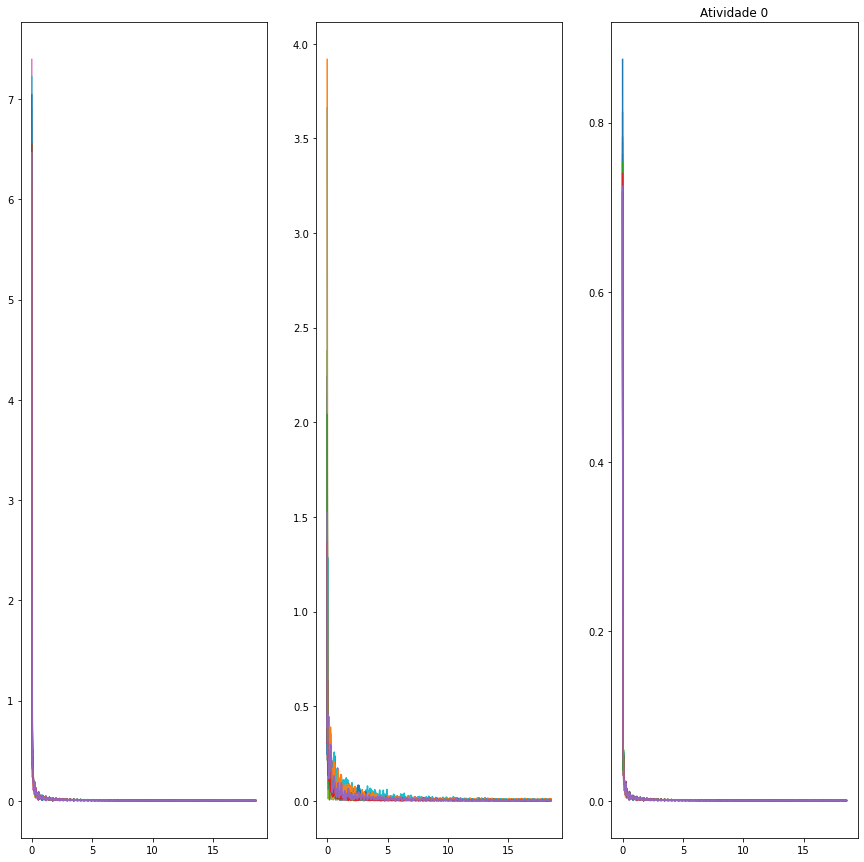

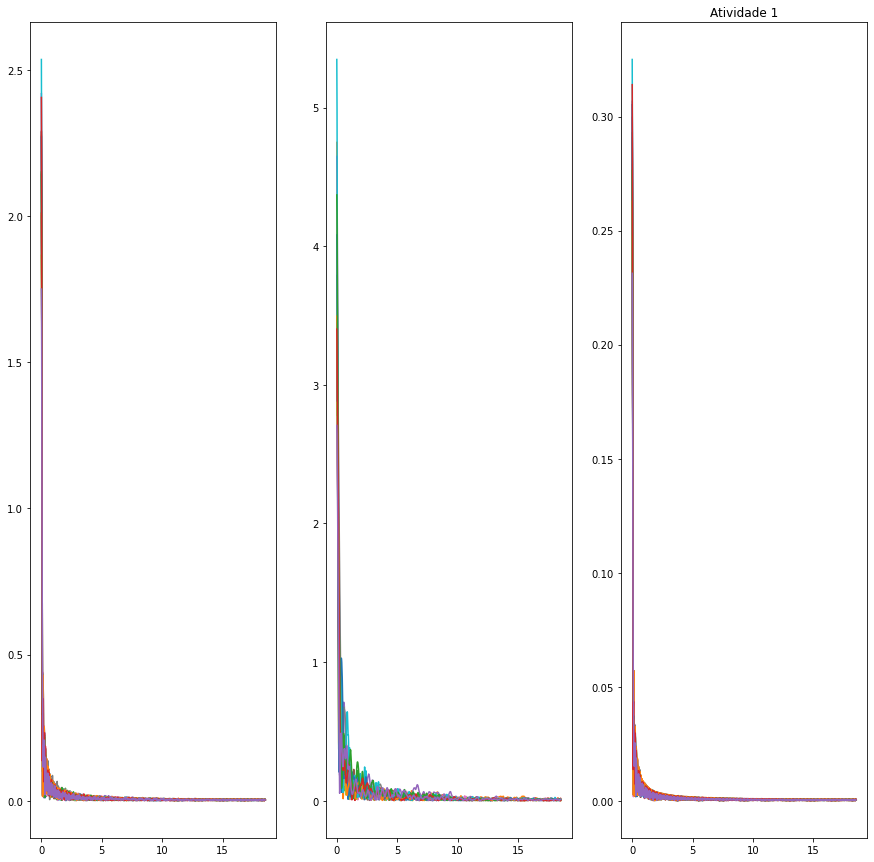

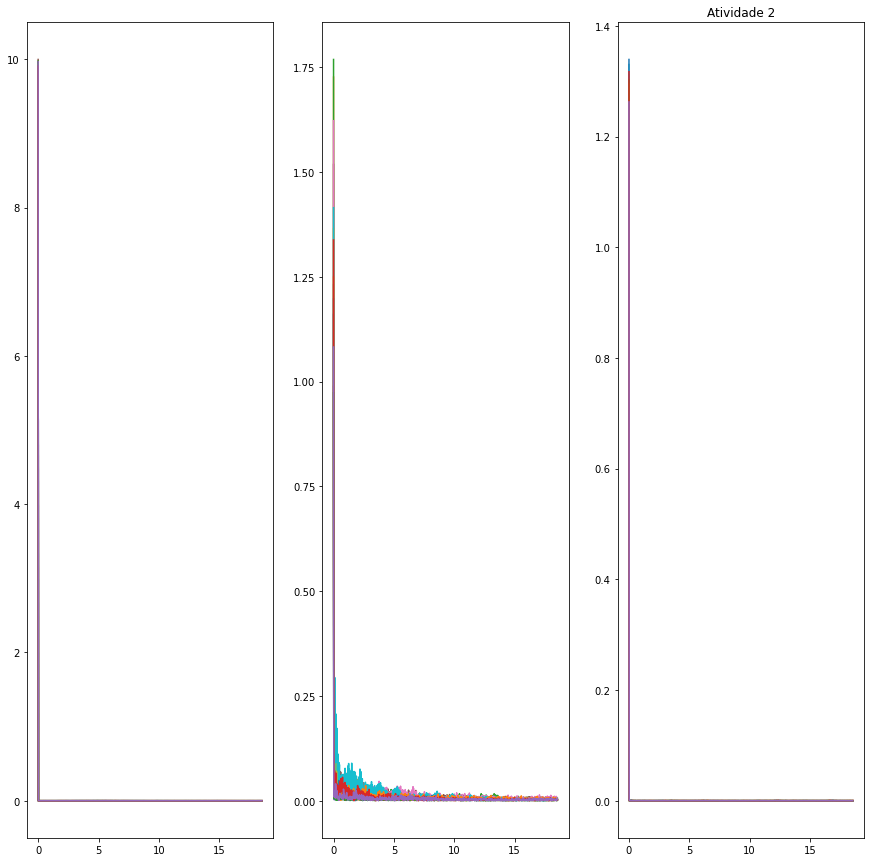

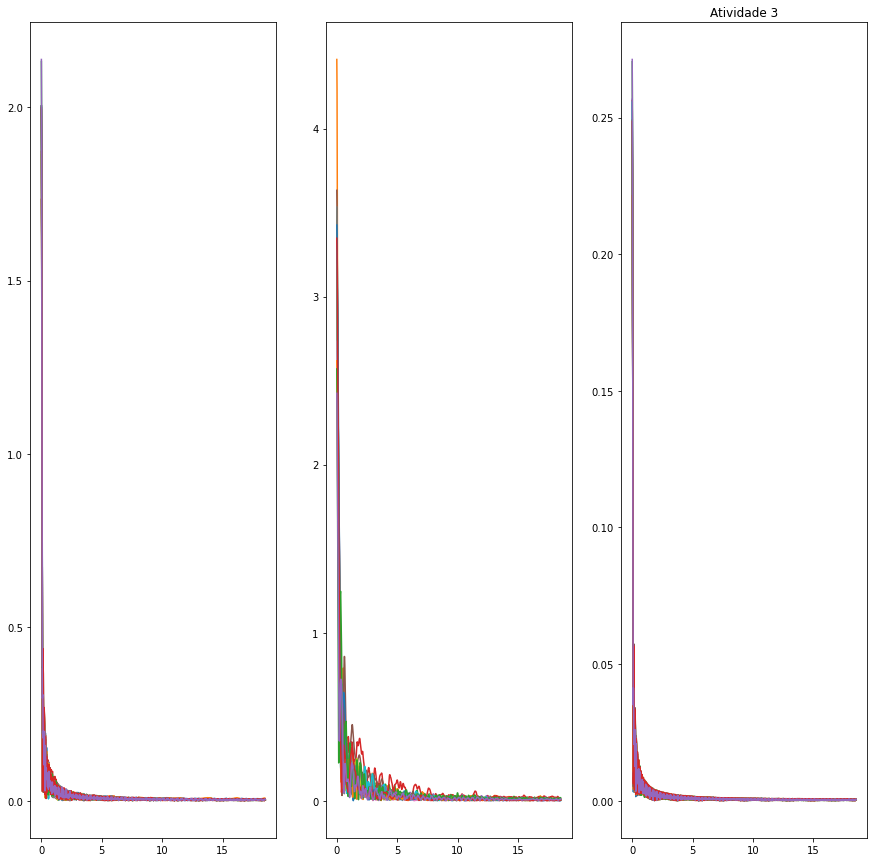

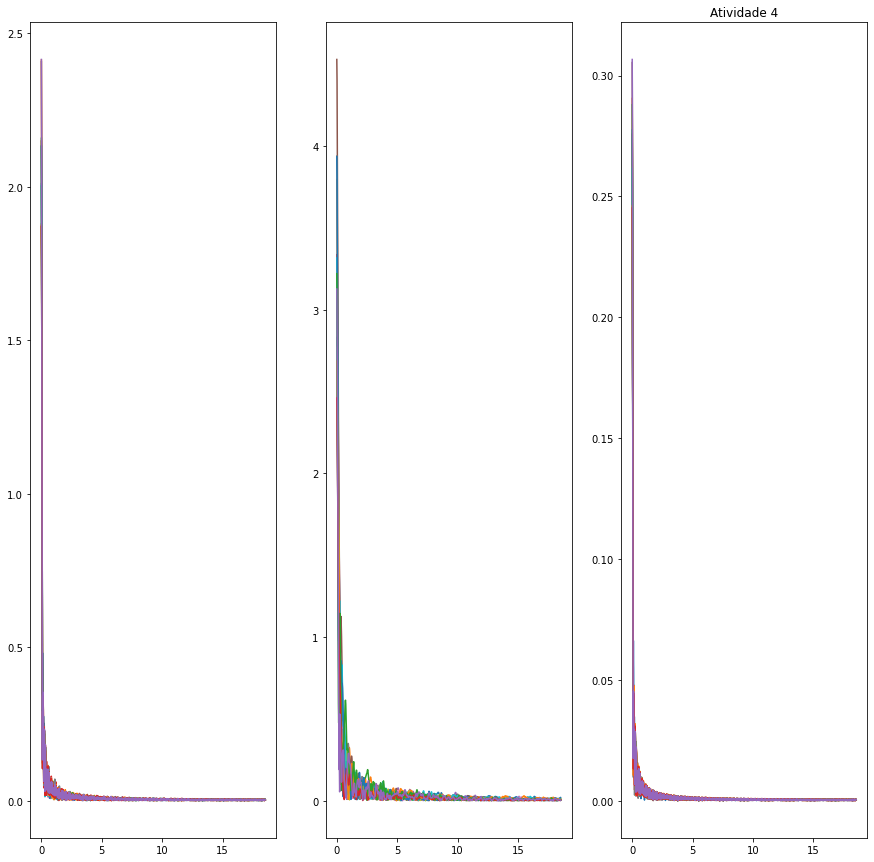

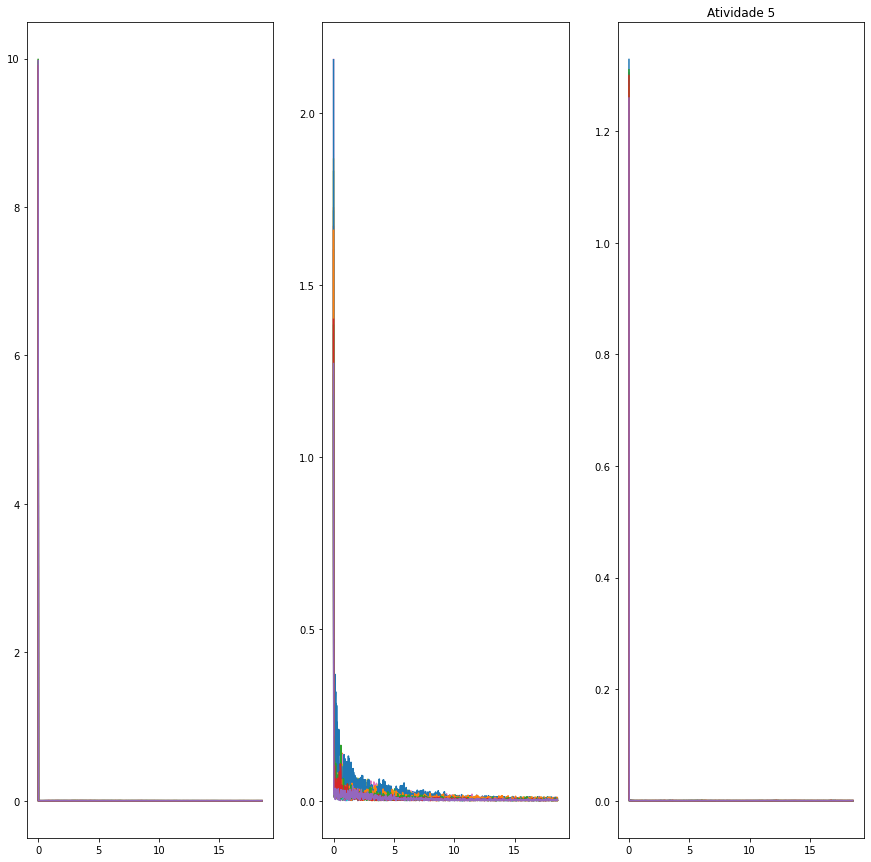

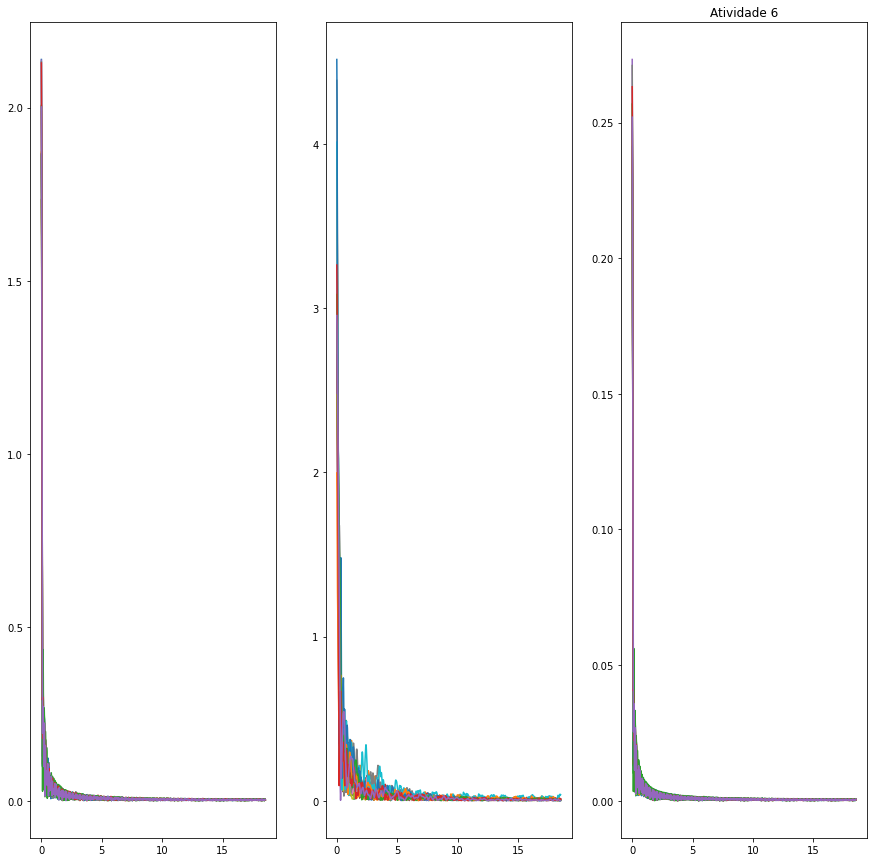

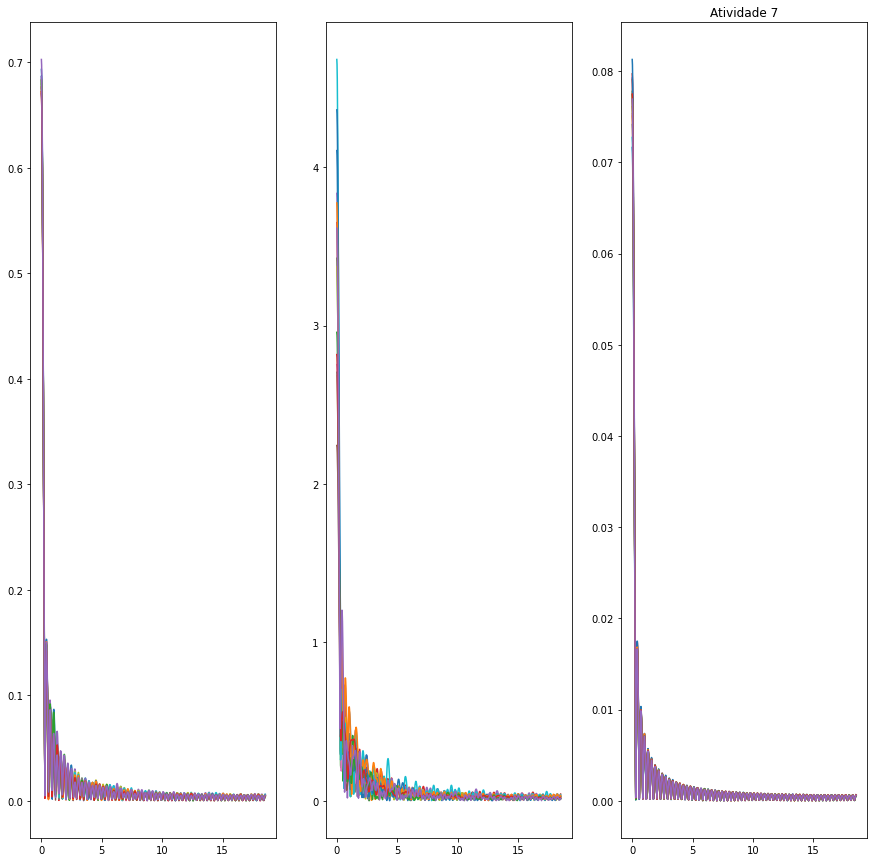

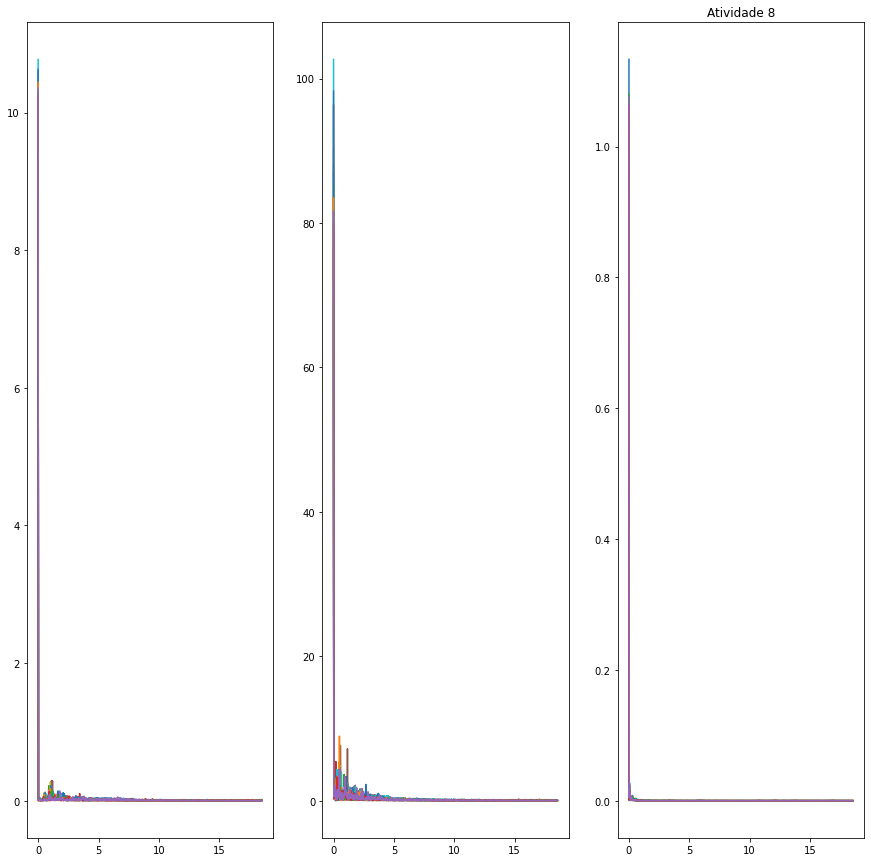

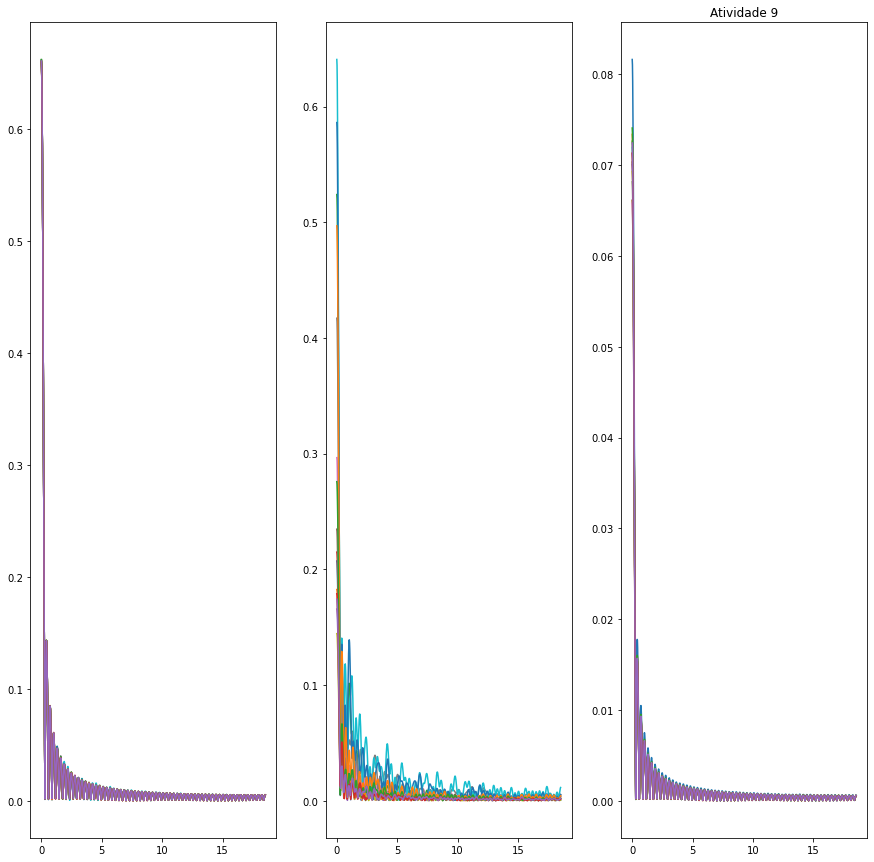

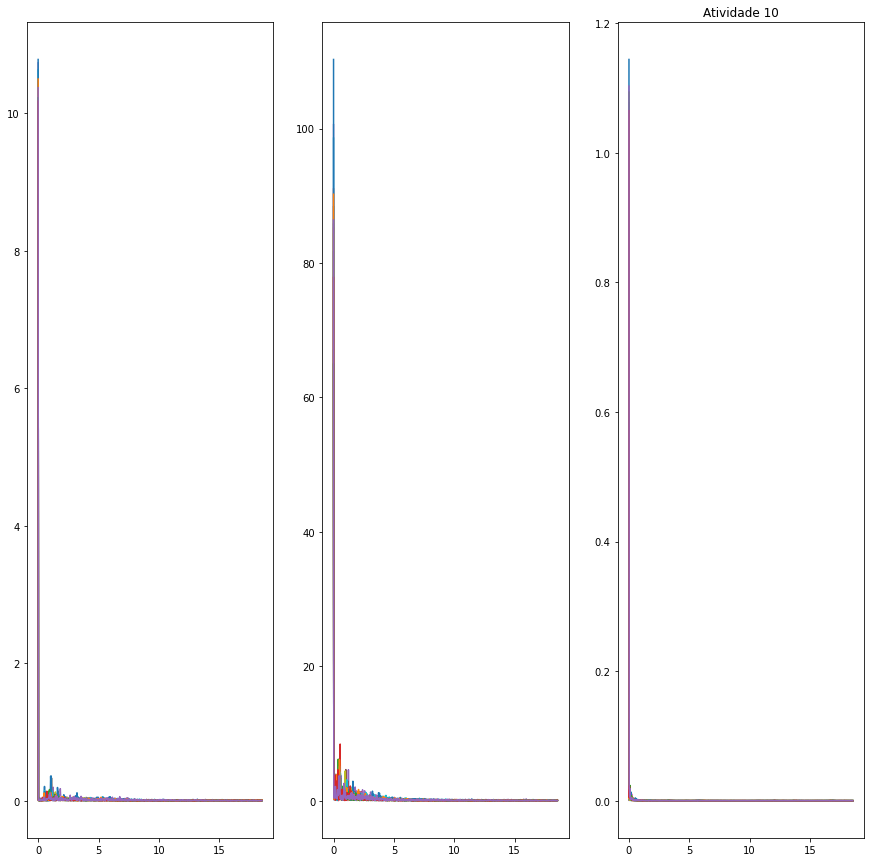

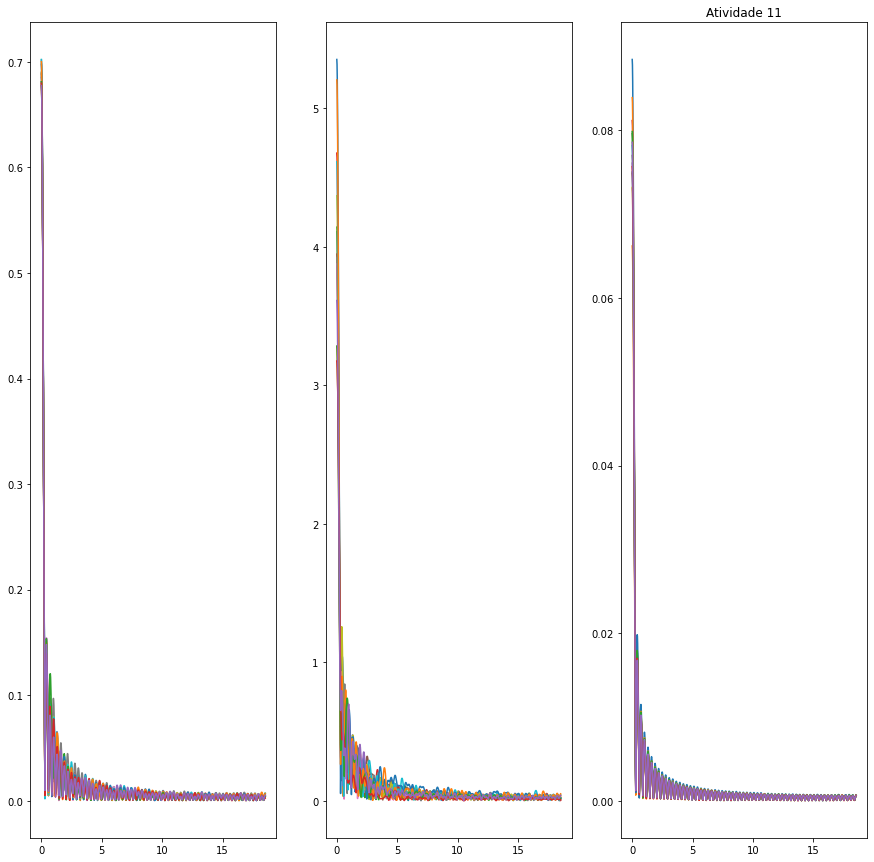

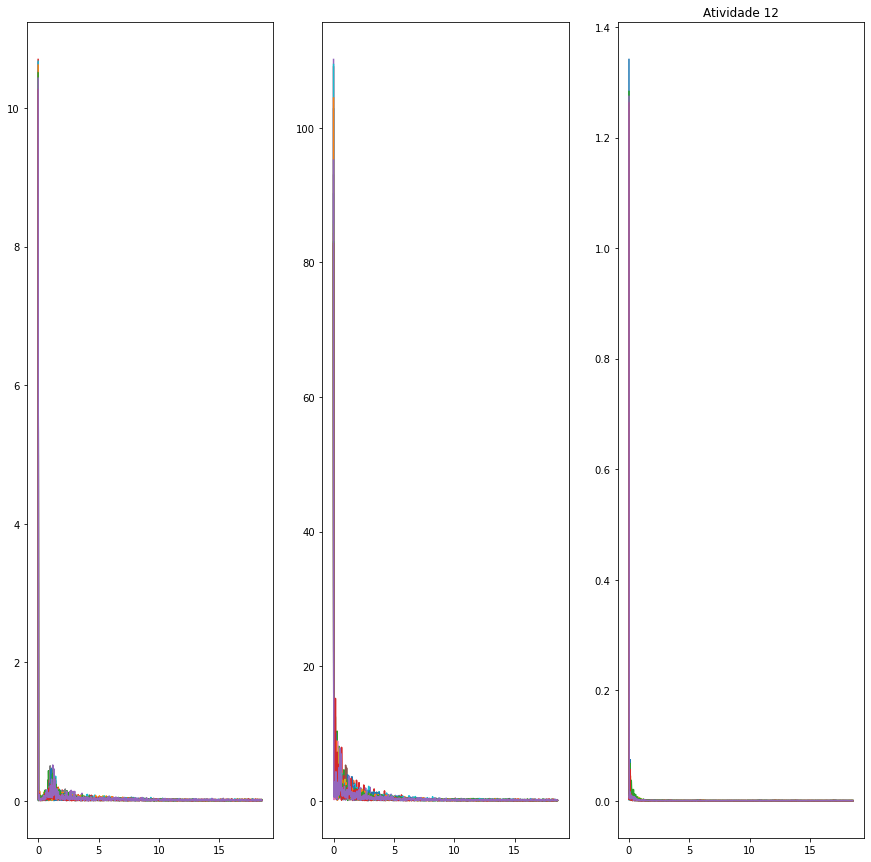

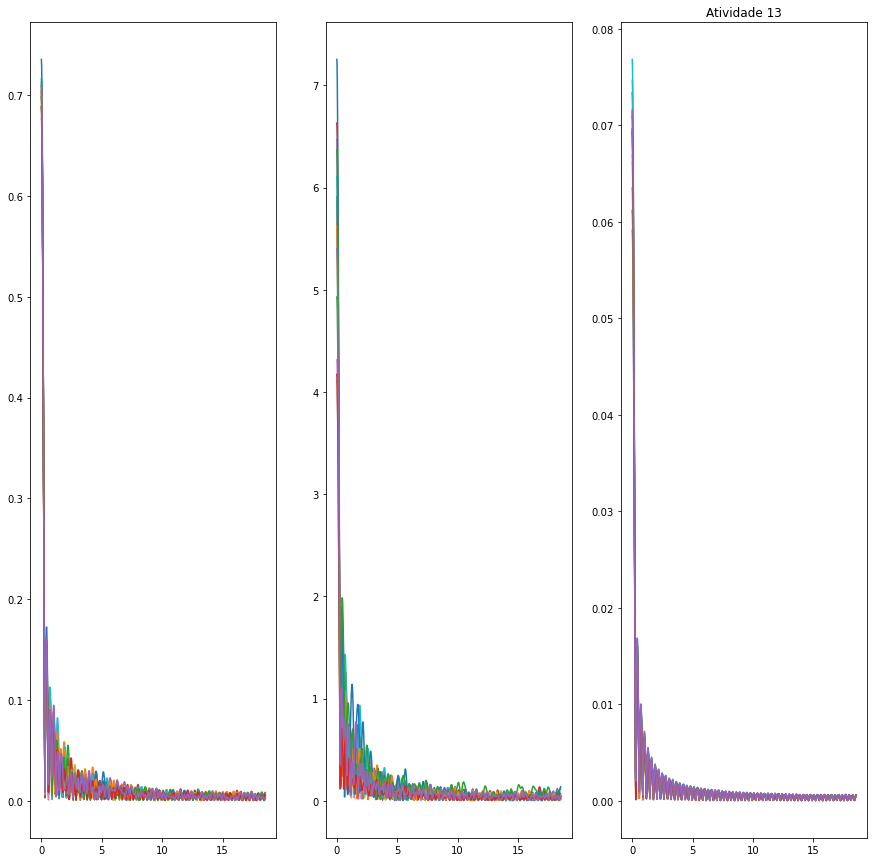

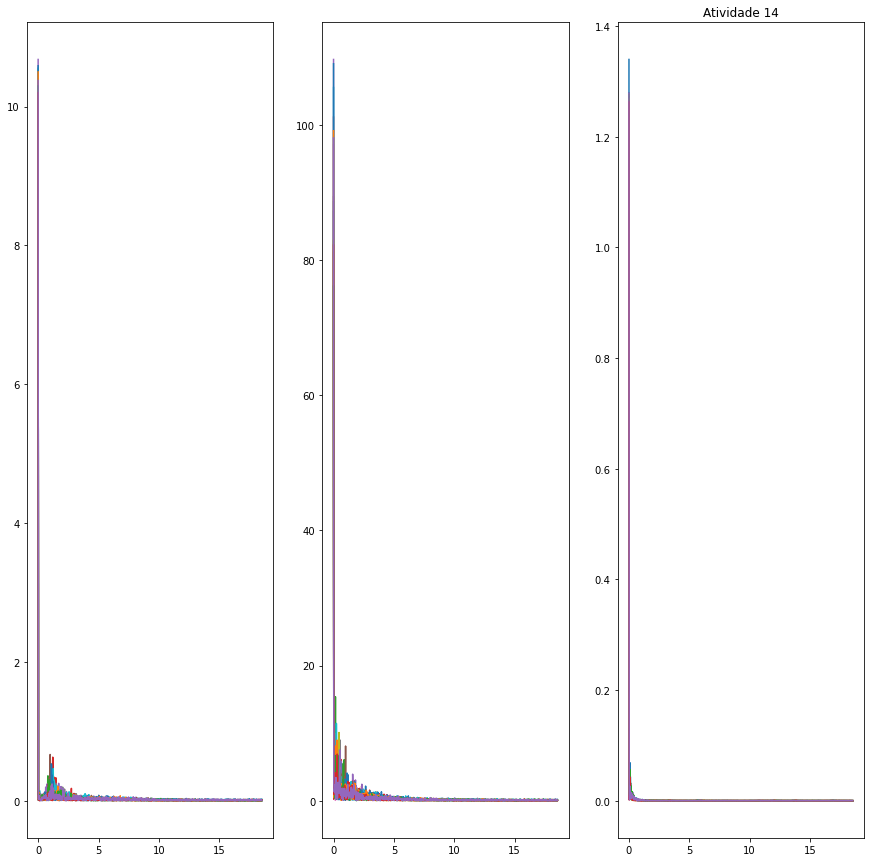

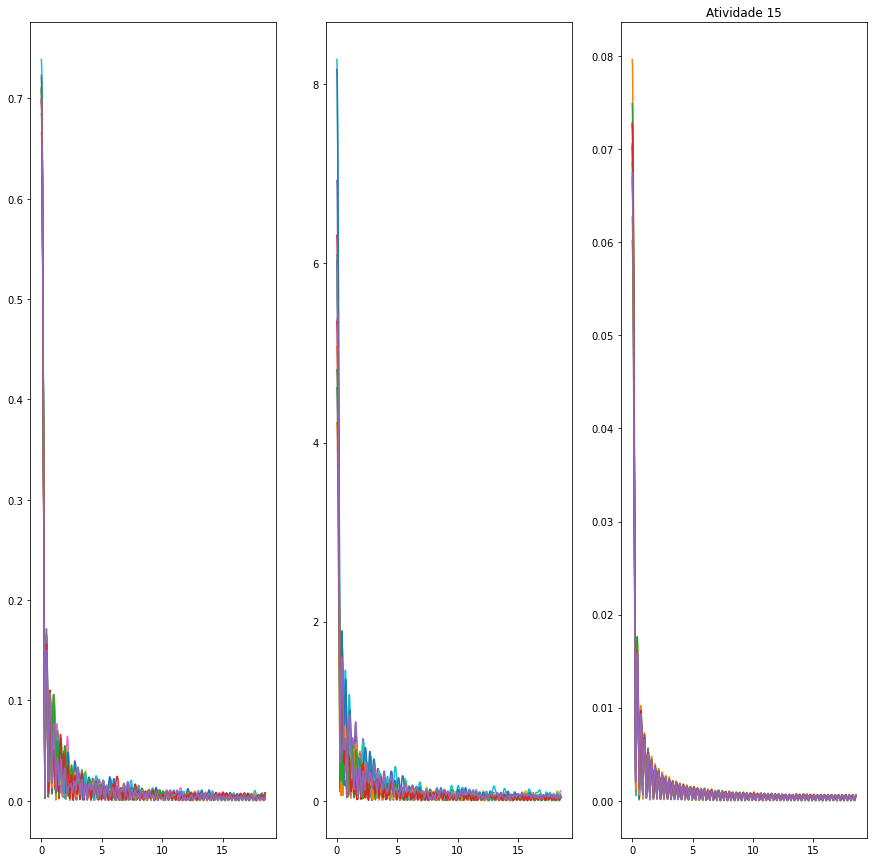

In [402]:
N = 1900
tstep = 1/fs
fstep = fs/N

f = np.linspace(0, (N-1)*fstep, N)
freqs = np.fft.fftfreq(N, fstep)

freqs_pos = [i for i in range(len(freqs)) if freqs[i] >= 0]

atividades = activities.unique()
    
for act_id in range(len(atividades)):
    
    act = atividades[act_id]
    
    fig, axs = plt.subplots(1,3, figsize=(15, 15))
        
    idx_1 = act_id // 4
    idx_2 = act_id % 4
    
    data_act = dft_stats_df[dft_stats_df["activity"]==act]
        
    for suj in range(15):
        
        data_act_suj = data_act[data_act["utente"]==suj]
        
        array_ffts_acc = np.array(data_act_suj["mean_dft_acc"])[0]
        array_ffts_gyr = np.array(data_act_suj["mean_dft_gyr"])[0]
        array_ffts_mag = np.array(data_act_suj["mean_dft_mag"])[0]

        amplitude_acc = np.abs(array_ffts_acc) / N
        amplitude_gyr = np.abs(array_ffts_gyr) / N
        amplitude_mag = np.abs(array_ffts_mag) / N
        
        axs[0].plot(freqs[freqs_pos], amplitude_acc[freqs_pos])
        axs[1].plot(freqs[freqs_pos], amplitude_gyr[freqs_pos])
        axs[2].plot(freqs[freqs_pos], amplitude_mag[freqs_pos])
        
    plt.title(f"Atividade {act_id}")
        
    plt.show()   
    

### 1.3

Comparando a representação em frequência dos módulos do vetor de aceleração, do vetor de giroscópio e do vetor de magnetómetro, concluímos que estas as representações dos 3 vetores são bastante semelhantes. 

Observando a representação média em frequência de cada atividade (e para cada sujeito), conseguimos observar que há algumas diferenças entre as várias atividades.

Em todas as atividades, a componente de frequência com maior amplitude é a componente correspondente a 0 Hz. Apesar desta ser sempre a componente com maior amplitude, essa amplitude varia entre sujeitos e entre atividades.

Depois, conseguimos notar que, enquanto em algumas atividade ainda temos outras componentes com alguma amplitude, noutras tal não se verifica.


### 1.4

Focando-nos mais na variabilidade entre sujeitos nas diversas atividades, conseguimos perceber que, apesar de haver ligeiras diferenças, em geral a representação em frequência é semelhante.

Os picos de frequência encontram-se no mesmo local para os diversos sujeiros (para a mesma atividade), sendo que onde há alguma divergência é no tamanho destes picos.

Por fim, é possível também concluír que estas diferenças observam-se mais no módulo do vetor de giroscópio, sendo bastante menores nos módulos dos vetores de aceleração e magnetómetro.

### 1.5

Observando as representações em frequência (média) das diversas atividades, é possível idealizar algumas features que podem ser úteis para distinguir as atividades.

A primeira será a soma das amplitudes correspondentes a frequências diferentes de 0 Hz e a segunda será a amplitude correspondente à componente de frequência com maior amplitude.

#### 1.5.1

Estas features são importantes pois é possível observar que em todas as atividades há um pico por volta dos 0 Hz. Depois disso, em algumas atividades, as amplitudes das frequências seguintes são quase 0. Enquanto isso, em outras, conseguimos perceber que há outras componentes de frequência com alguma amplitude. Assim sendo, vamos somar as amplitudes correspondentes a frequências diferentes de 0Hz para tentar identificar qual dos casos é.

Para além disso, também conseguimos ver que, apesar de haver um "pico" por volta dos 0 Hz em todas as atividades, o valor correspondente a este "pico" varia de atividades para atividades. Assim, vamos retirar a amplitude correspondente à frequência de maior amplitude (que é sempre sempre a componente correspondente a 0 Hz).

#### 1.5.2

In [432]:
acc_50 = []
gyr_50 = []
mag_50 = []
acc_2_10 = []
gyr_2_10 = []
mag_2_10 = []

for i in range(dft_array.shape[0]):
    
    dfts_acc = np.array(dft_array[i][2][freqs_pos])
    dfts_acc = dfts_acc/N
    
    dfts_gyr = np.array(dft_array[i][3][freqs_pos])
    dfts_gyr = dfts_gyr/N

    dfts_mag = np.array(dft_array[i][4][freqs_pos])
    dfts_mag = dfts_mag/N

    sum_amp_acc = sum(abs(dfts_acc[1:]))
    amp_0_acc = abs(dfts_acc[0])
    
    sum_amp_gyr = sum(abs(dfts_gyr[1:]))
    amp_0_gyr = abs(dfts_gyr[0])
    
    sum_amp_mag = sum(abs(dfts_mag[1:]))
    amp_0_mag = abs(dfts_mag[0])
        
    acc_50.append(sum_amp_acc)
    gyr_50.append(sum_amp_gyr)
    mag_50.append(sum_amp_mag)
    
    acc_2_10.append(amp_0_acc)
    gyr_2_10.append(amp_0_gyr)
    mag_2_10.append(amp_0_mag)
    

In [433]:
dft_df["feat1_acc"] = np.array(acc_50)
dft_df["feat2_acc"] = np.array(acc_2_10)

dft_df["feat1_gyr"] = np.array(gyr_50)
dft_df["feat2_gyr"] = np.array(gyr_2_10)

dft_df["feat1_mag"] = np.array(mag_50)
dft_df["feat2_mag"] = np.array(mag_2_10)

In [434]:
dft_stats_array = np.array(dft_df)
new_features = dft_df[["utente", "feat1_acc", "feat2_acc", "feat1_gyr", "feat2_gyr", "feat1_mag", "feat2_mag"]]
print(dft_df.shape)
dft_df.head()

(2100, 11)


,utente,activity,dft_acc,dft_gyr,dft_mag,feat1_acc,feat2_acc,feat1_gyr,feat2_gyr,feat1_mag,feat2_mag
0,0.0,1.0,"[(18726.505323895082+0j), (1.2568265007943453-...","[(5260.540528184631+0j), (-629.6410395073706-1...","[(2333.976243033633+0j), (0.3815028117433366-1...",0.957129,9.856055,30.087863,2.768706,0.231101,1.228409
1,0.0,8.0,"[(3828.91695564147+0j), (2881.3085615475093-21...","[(7628.834535104115+0j), (7094.378511911375-22...","[(465.42346111050927+0j), (352.1859550014334-2...",16.454712,2.015219,112.423561,4.015176,1.947792,0.244960
2,0.0,2.0,"[(18980.546453280433+0j), (-0.1926761375376224...","[(2545.2089061793477+0j), (23.895503170129455-...","[(2268.29775022097+0j), (0.2234413454226114+0....",0.383384,9.989761,6.721679,1.339584,0.113490,1.193841
3,0.0,9.0,"[(3799.4544111486903+0j), (2863.8374802369426-...","[(8046.282671175037+0j), (7510.420427056224-20...","[(467.50191846220264+0j), (352.16489329747856-...",16.501649,1.999713,113.074818,4.234886,1.939568,0.246054
4,0.0,1.0,"[(11351.123544073062+0j), (-1832.7597028685236...","[(2228.153363586347+0j), (-425.9803243883182-8...","[(1402.1552171431845+0j), (-227.6431617845995-...",15.994244,5.974276,16.431383,1.172712,2.032458,0.737976


In [435]:
new_features.head()

,utente,feat1_acc,feat2_acc,feat1_gyr,feat2_gyr,feat1_mag,feat2_mag
0,0.0,0.957129,9.856055,30.087863,2.768706,0.231101,1.228409
1,0.0,16.454712,2.015219,112.423561,4.015176,1.947792,0.244960
2,0.0,0.383384,9.989761,6.721679,1.339584,0.113490,1.193841
3,0.0,16.501649,1.999713,113.074818,4.234886,1.939568,0.246054
4,0.0,15.994244,5.974276,16.431383,1.172712,2.032458,0.737976


In [438]:
acts = list(activities.unique())

means_feat1_acc = []
means_feat2_acc = []

means_feat1_gyr = []
means_feat2_gyr = []

means_feat1_mag = []
means_feat2_mag = []

for act in acts:
    
    act_df = dft_df[dft_df["activity"]==act]
    
    feat1_acc = np.mean(act_df["feat1_acc"])
    feat2_acc = np.mean(act_df["feat2_acc"])
    
    feat1_gyr = np.mean(act_df["feat1_gyr"])
    feat2_gyr = np.mean(act_df["feat2_gyr"])
          
    feat1_mag = np.mean(act_df["feat1_mag"])
    feat2_mag = np.mean(act_df["feat2_mag"])
    
    means_feat1_acc.append(feat1_acc)
    means_feat2_acc.append(feat2_acc)

    means_feat1_gyr.append(feat1_gyr)
    means_feat2_gyr.append(feat2_gyr)
    
    means_feat1_mag.append(feat1_mag)
    means_feat2_mag.append(feat2_mag)
    
means_new_feats = pd.DataFrame(zip(acts, means_feat1_acc, means_feat2_acc, means_feat1_gyr, means_feat2_gyr, means_feat1_mag, means_feat2_mag))

means_new_feats.head(20)

,0,1,2,3,4,5,6
0,1.0,13.782095,6.636561,39.941617,2.112427,1.646117,0.740660
1,8.0,16.833193,2.160732,94.408960,3.725065,2.053945,0.279748
2,2.0,0.500952,9.930848,11.735916,1.319796,0.181864,1.287676
3,9.0,16.435994,1.947203,92.384104,3.251527,2.020493,0.245481
4,10.0,16.489344,2.088216,85.337610,3.192166,2.034944,0.268027
5,3.0,0.809703,9.926883,17.192217,1.614300,0.192477,1.273743
6,11.0,16.196401,1.955717,91.868306,3.245601,2.007435,0.245273
7,12.0,16.524527,0.680994,136.721561,3.398937,1.666557,0.076738
8,4.0,25.350488,10.441221,490.661412,86.009375,0.555563,1.054803
9,13.0,14.340244,0.660699,13.365888,0.315961,1.539554,0.070988


## 2

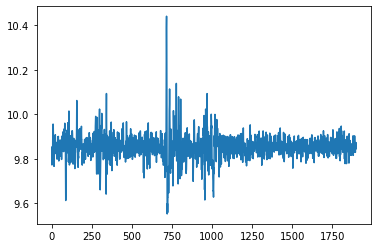

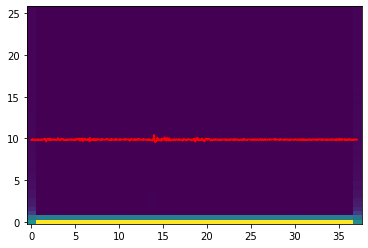

In [683]:
plt.plot(transformed_data_array[:1900, 2])
plt.show()

f,t,Zxx = stft(transformed_data_array[:1900, 2], fs=fs, window='hamming', nperseg=100, noverlap=50)
tf = np.abs(Zxx)
plt.pcolormesh(t, f, tf)
plt.plot(np.arange(0, 1900*(1/fs), 1/fs), transformed_data_array[:1900, 2], 'r') # *30 + 30 e so para ir tudo para a mesma gama de valores
plt.show()

## 3

### 3.1

In [439]:
final_feature_set = pd.concat([new_features, all_segments_pd], axis=1)

final_feature_set_array = np.array(final_feature_set)

In [441]:
print(final_feature_set.shape)
final_feature_set.head()

(2100, 171)


,utente,feat1_acc,feat2_acc,feat1_gyr,feat2_gyr,feat1_mag,feat2_mag,0,1,2,...,154,155,156,157,158,159,160,161,162,163
0,0.0,0.957129,9.856055,30.087863,2.768706,0.231101,1.228409,-1.700871,-1.70110,0.137906,...,3273.649476,0.000000,233.634431,0.0,948.738736,0.0,2674.455551,82831.657269,9461.480127,1.0
1,0.0,16.454712,2.015219,112.423561,4.015176,1.947792,0.244960,-1.094552,-0.85822,0.649878,...,40202.138443,0.133681,13.149085,0.0,102.531671,0.0,447.809358,12736.856069,162557.578712,8.0
2,0.0,0.383384,9.989761,6.721679,1.339584,0.113490,1.193841,-0.525423,-0.53465,0.076139,...,2380.895115,0.000000,298.614054,0.0,1031.913012,0.0,6873.338444,191598.307160,4153.772352,2.0
3,0.0,16.501649,1.999713,113.074818,4.234886,1.939568,0.246054,-2.161692,-2.26620,0.491868,...,38890.735063,0.000000,106.519141,0.0,97.145508,0.0,364.099041,12535.650068,208156.132525,9.0
4,0.0,15.994244,5.974276,16.431383,1.172712,2.032458,0.737976,-2.275830,-2.28220,0.100529,...,1252.057280,0.000000,395.536807,0.0,332.758546,0.0,976.987725,37256.832801,2712.966406,1.0


## 4

### 4.1

#### 4.1.1

In [480]:
def TT_split(data, p_test):
    
    # data - array with the target column as the last column
    # p_test - fraction of test values we want (0 to 1)
    # returns the train and test sets for the data given
    
    X = data[:, :-1]
    Y = data[:, -1]
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=p_test)
    
    return x_train, x_test, y_train, y_test

#### 4.1.2

In [555]:
def LOSO_split(X, Y, subjects):
    
    # data - array with the target column as the last column and the subjects as the first
    # groups - array indicating to which group each row belongs
    # returns - all splits
    
    loso = LeaveOneGroupOut()
    split =  loso.split(X, Y, groups=subjects)
    
    return split

### 4.2

In [478]:
def get_metrics(model, x_test, y_test):
    
    # model - trained model
    # x_test - test features
    # y_test - test target feature
    # returns the confusion matriz, recall, precision and f1-score of the model
    
    y_predict = model.predict(x_test)
    
    confusion = confusion_matrix(y_test, y_predict)
    recall = recall_score(y_test, y_predict, average="weighted")
    precision = precision_score(y_test, y_predict, average="weighted")
    f1 = f1_score(y_test, y_predict, average="weighted")
    
    return confusion, recall, precision, f1

## 5

### 5.1

In [476]:
def train_svm(x_train, y_train):
    
    model = make_pipeline(StandardScaler(), SVC(gamma="auto"))
    model.fit(x_train, y_train)
    
    return model

#### 5.1.1

In [474]:
def svm_TT(data, p_test):
    
    # data - array with the target column as the last column
    # p_test - fraction of test values we want (0 to 1)
    # returns the metrics
    
    x_train, x_test, y_train, y_test = TT_split(data, p_test)
    svc = train_svm(x_train, y_train)
    metrics = get_metrics(svc, x_test, y_test)
    
    return metrics

In [482]:
conf = []
recall = []
precision = []
f1 = []

for i in range(30):
    metrics = svm_TT(final_feature_set_array[:, 1:], 0.3)
    
    conf.append(metrics[0])
    recall.append(metrics[0])
    precision.append(metrics[0])
    f1.append(metrics[0])

In [491]:
conf_mean = np.mean(np.array(conf), axis=1)
recall_mean = np.mean(recall)
precision_mean = np.mean(precision)
f1_mean = np.mean(f1)

conf_std = np.std(np.array(conf), axis=1)
recall_std = np.std(recall)
precision_stf = np.std(precision)
f1_std = np.std(f1)

#### 5.1.2

In [556]:
def svm_LOSO(data):
    
    # data - array with the target column as the last column and the subject as the first
    # returns - arrays with the metrics for each iteration
    
    conf = []
    recall = []
    precision = []
    f1 = []
    
    X = data[:, 1:-1]
    Y = data[:, -1]
    subjects = data[:, 0]

    splits = LOSO_split(X, Y, subjects)
    
    for i, (train_index, test_index) in enumerate(splits):
                
        x_train = X[train_index, :]
        y_train = Y[train_index]
        
        x_test = X[test_index, :]
        y_test = Y[test_index]
        
        svm = train_svm(x_train, y_train)
        
        metrics = get_metrics(svm, x_test, y_test)
        
        conf.append(metrics[0])
        recall.append(metrics[0])
        precision.append(metrics[0])
        f1.append(metrics[0])
        
    return conf, recall, precision, f1

In [593]:
def get_all_metrics_data(data):
    
    # data - array with the target column as the last column and the subject as the first
    
    #----------- tt -------------
    
    conf_tt = []
    recall_tt = []
    precision_tt = []
    f1_tt = []

    for i in range(30):
        
        metrics = svm_TT(data[:, 1:], 0.3)
    
        conf_tt.append(metrics[0])
        recall_tt.append(metrics[1])
        precision_tt.append(metrics[2])
        f1_tt.append(metrics[3])
        
    conf_mean_tt = np.mean(np.array(conf_tt), axis=1)
    recall_mean_tt = np.mean(recall_tt)
    precision_mean_tt = np.mean(precision_tt)
    f1_mean_tt = np.mean(f1_tt)

    conf_std_tt = np.std(np.array(conf_tt), axis=1)
    recall_std_tt = np.std(recall_tt)
    precision_stf_tt = np.std(precision_tt)
    f1_std_tt = np.std(f1_tt)
    
    #----------- loso -------------

    metrics_loso = svm_LOSO(data)

    conf = metrics_loso[0]
    recall = metrics_loso[1]
    precision = metrics_loso[2]
    f1 = metrics_loso[3]

    conf_mean = np.mean(np.array(conf), axis=1)
    recall_mean = np.mean(recall)
    precision_mean = np.mean(precision)
    f1_mean = np.mean(f1)

    conf_std = np.std(np.array(conf), axis=1)
    recall_std = np.std(recall)
    precision_std = np.std(precision)
    f1_std = np.std(f1)

    return conf_mean_tt, conf_std_tt, recall_mean_tt, recall_std_tt, precision_mean_tt, precision_stf_tt, f1_mean_tt, f1_std_tt, conf_mean, conf_std, recall_mean, recall_std, precision_mean, precision_std, f1_mean, f1_std

## 6

In [602]:
metrics_all_columns = get_all_metrics_data(final_feature_set_array)

/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


feature selection using fisher score

In [ ]:
fisher_scores = fisher_score(final_feature_set_array[:, 1:])

In [660]:
# TOP 10 features acording to feature score

sort_idx = np.array(fisher_scores).argsort()
top_10_features = list(sort_idx[-10:])
print(top_10_features)

[2, 74, 58, 52, 158, 167, 54, 3, 5, 1]


In [661]:
# TOP 50 feature according to feature score

top_50_features = list(sort_idx[-50:])
print(top_50_features)

top_100_features = list(sort_idx[-100:])

[141, 83, 49, 156, 84, 8, 25, 32, 27, 14, 85, 60, 0, 63, 65, 30, 47, 41, 43, 166, 69, 71, 21, 104, 154, 162, 19, 93, 97, 82, 168, 164, 4, 53, 102, 80, 142, 75, 96, 152, 2, 74, 58, 52, 158, 167, 54, 3, 5, 1]


In [662]:
# adding the subject id and the activity

top_10_features = [i+1 for i in top_10_features]
top_10_features.append(0)
top_10_features.append(final_feature_set_array.shape[1]-1)
top_10_features.sort()

top_100_features = [i-1 for i in top_100_features]
top_100_features.append(0)
top_100_features.append(final_feature_set_array.shape[1]-1)
top_100_features.sort()

top_50_features = [i+1 for i in top_50_features]
top_50_features.append(0)
top_50_features.append(final_feature_set_array.shape[1]-1)
top_50_features.sort()

In [663]:
final_features_10_fisher = final_feature_set_array[:, top_10_features]
final_features_50_fisher = final_feature_set_array[:, top_50_features]
final_features_100_fisher = final_feature_set_array[:, top_100_features]

In [665]:
metrics_10_fisher = get_all_metrics_data(final_features_10_fisher)

/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics

/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics

In [599]:
metrics_50_fisher = get_all_metrics_data(final_features_50_fisher)

/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics

In [640]:
relief_weights = reliefF(final_feature_set_array[:, 1:], -1, 10)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169


In [641]:
sort_idx_relief = np.array(relief_weights).argsort()
print(sort_idx_relief)

[  0 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 107 125 106 104  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 105 126 127 128 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 150 149 148 147 129 130 131 132 133 134 135 136
  86 137 139 140 141 142 143 144 145 146 138  85  84  83  23  24  25  26
  27  28  29  30  31  32  33  34  35  36  37  38  39  22  21  20  19   1
   2   3   4   5   6   7   8  40   9  11  12  13  14  15  16  17  18  10
 168  41  43  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  65  64  63  62  44  45  46  47  48  49  50  51  42  52  54  55
  56  57  58  59  60  61  53 169]


In [645]:
top_50_features_relief = list(sort_idx_relief[-50:])
top_10_features_relief = list(sort_idx_relief[-10:])

top_10_features_relief = [i+1 for i in top_10_features_relief]
top_50_features_relief = [i+1 for i in top_50_features_relief]

top_10_features_relief.append(0)
top_50_features_relief.append(0)

top_10_features_relief.sort()
top_50_features_relief.sort()

In [646]:
final_features_10_relief = final_feature_set_array[:, top_10_features_relief]
final_features_50_relief = final_feature_set_array[:, top_50_features_relief]

In [647]:
metrics_10_relief = get_all_metrics_data(final_features_10_relief)
metrics_50_relief = get_all_metrics_data(final_features_50_relief)

/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics

/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rodrigo/anaconda3/lib/python3.9/site-packages/sklearn/metrics

In [649]:
results = pd.DataFrame(columns=["conf_mean_tt", "conf_std_tt", "recall_mean_tt", "recall_std_tt", 
                                "precision_mean_tt", "precision_stf_tt", "f1_mean_tt", "f1_std_tt", 
                                "conf_mean", "conf_std", "recall_mean", "recall_std", 
                                "precision_mean", "precision_std", "f1_mean2", "f1_std"])

results.loc[0] = metrics_all_columns
results.loc[1] = metrics_10_fisher
results.loc[2] = metrics_50_fisher
results.loc[3] = metrics_10_relief
results.loc[4] = metrics_50_relief

results.head()

,conf_mean_tt,conf_std_tt,recall_mean_tt,recall_std_tt,precision_mean_tt,precision_stf_tt,f1_mean_tt,f1_std_tt,conf_mean,conf_std,recall_mean,recall_std,precision_mean,precision_std,f1_mean2,f1_std
0,"[[9.5625, 1.625, 1.125, 3.4375, 2.125, 1.25, 1...","[[31.892335971985496, 4.428247395979588, 3.295...",0.677196,0.013233,0.670795,0.019093,0.661113,0.014343,"[[1.875, 0.4375, 0.1875, 0.5, 0.75, 0.3125, 0....","[[7.261843774138907, 1.1709371246996996, 0.526...",0.546875,2.464834,0.546875,2.464834,0.546875,2.464834
1,"[[8.0625, 0.0, 2.6875, 3.0625, 2.8125, 1.5625,...","[[30.968671165389065, 0.0, 6.934684113209483, ...",0.613122,0.017296,0.561337,0.025350,0.568299,0.021208,"[[1.875, 0.5625, 0.0625, 0.25, 1.0, 0.3125, 0....","[[7.261843774138907, 1.4986973510352248, 0.242...",0.546875,2.448297,0.546875,2.448297,0.546875,2.448297
2,"[[8.5, 2.1875, 0.8125, 2.5625, 3.375, 1.375, 1...","[[32.920358442763046, 5.790280109804706, 2.480...",0.670952,0.016512,0.654413,0.024877,0.648157,0.020242,"[[1.875, 0.5, 0.125, 0.5, 0.75, 0.3125, 0.3125...","[[7.261843774138907, 1.3693063937629153, 0.484...",0.546875,2.476113,0.546875,2.476113,0.546875,2.476113
3,"[[11.6875, 0.5625, 0.0625, 3.4375, 4.5625, 1.0...","[[24.710116222915666, 1.4986973510352248, 0.24...",0.394497,0.012763,0.355709,0.025441,0.347803,0.016620,"[[3.5, 0.25, 0.0, 0.6875, 0.8125, 0.25, 0.0625...","[[7.202430145443967, 0.6614378277661477, 0.0, ...",0.546875,1.970324,0.546875,1.970324,0.546875,1.970324
4,"[[11.4375, 1.1875, 0.9375, 2.9375, 3.5625, 1.3...","[[28.416475744715424, 3.0458732327528013, 2.53...",0.576614,0.015274,0.573271,0.022121,0.557878,0.016136,"[[2.1875, 0.25, 0.25, 0.5625, 0.8125, 0.1875, ...","[[7.204328126203026, 0.75, 0.75, 1.49869735103...",0.546875,2.202246,0.546875,2.202246,0.546875,2.202246


### 6.1

Olhando para os resultados obtidos, é possível concluir que a seleção de features tem um grande impacto na performance do modelo. 

É possível perceber que o modelo obtém melhores resultados quando é treinado utilizando todas features, sendo estes apenas ligeiramene piores quando utilizamos 50 features e muito piores quando utilizamos 10.

Para além disso, é possível perceber que a performance do modelo é melhor quando este é treinado utilizando um train-test split. Para além de a sua performance ser melhor neste caso, os resultados também são mais estáveis, sendo os desvios padrões das métricas muito menores.

Para além disso, olhando para as features que estão a ser selecionadas quando utilizamos reliefF e Fisher score, conseguimos perceber que as métricas que criamos no ponto 1 são úteis para distinguir as atividades.